# Augmentation

In [1]:
import shutil
import os

# Source and destination paths
source_dir = "/kaggle/input/dip-d3/Detecting Mycobacterium tuberculosis Bacilli from TB Smear Images/Negative"
destination_dir = "/kaggle/working/Augmented/Nomral"

# Create the destination directory if it doesn't exist
os.makedirs(destination_dir, exist_ok=True)

# Copy the directory
try:
    shutil.copytree(source_dir, destination_dir, dirs_exist_ok=True)
    print(f"Directory copied from {source_dir} to {destination_dir}")
except Exception as e:
    print(f"Error: {e}")

Directory copied from /kaggle/input/dip-d3/Detecting Mycobacterium tuberculosis Bacilli from TB Smear Images/Negative to /kaggle/working/Augmented/Nomral


In [2]:
import shutil
import os

# Source and destination paths
source_dir = "/kaggle/input/dip-d3/Detecting Mycobacterium tuberculosis Bacilli from TB Smear Images/Positive"
destination_dir = "/kaggle/working/Augmented/Tuberculosis"

# Create the destination directory if it doesn't exist
os.makedirs(destination_dir, exist_ok=True)

# Copy the directory
try:
    shutil.copytree(source_dir, destination_dir, dirs_exist_ok=True)
    print(f"Directory copied from {source_dir} to {destination_dir}")
except Exception as e:
    print(f"Error: {e}")


Directory copied from /kaggle/input/dip-d3/Detecting Mycobacterium tuberculosis Bacilli from TB Smear Images/Positive to /kaggle/working/Augmented/Tuberculosis


In [3]:
import os
from PIL import Image
import cv2
import numpy as np
from imgaug import augmenters as iaa

# Define paths
input_folder = r'/kaggle/input/dip-d3/Detecting Mycobacterium tuberculosis Bacilli from TB Smear Images/Negative'
# Output directory where augmented images will be saved
output_folder = r'/kaggle/working/Augmented/Nomral'

# Create the output directory if it does not exist
os.makedirs(output_folder, exist_ok=True)

# Function to load images from a folder
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = Image.open(os.path.join(folder, filename))
        if img is not None:
            images.append(np.array(img))
    return images

# Load the original images
images = load_images_from_folder(input_folder)

# Define an augmentation pipeline
seq = iaa.Sequential([
    iaa.Fliplr(0.5),  # Horizontal flip
    iaa.Flipud(0.5),  # Vertical flip
    iaa.Multiply((0.6, 0.8)),  # Adjust brightness
    iaa.Affine(scale=(0.8, 1.0)),  # Zoom in/out by 80% to 120%
    iaa.Affine(rotate=(-10, 10)),  # Rotate by -20 to 20 degrees
    iaa.Crop(percent=(0, 0.2)),  # Crop images
])

# Number of augmentations per original image
augmentations_per_image = (1500 - len(images)) // len(images) + 1

# Augment and save images
augmented_count = 0
for i, image in enumerate(images):
    for _ in range(augmentations_per_image):
        augmented_image = seq(image=image)
        augmented_image_pil = Image.fromarray(augmented_image)
        output_path = os.path.join(output_folder, f'augmented_{i}_{augmented_count}.JPG')
        augmented_image_pil.save(output_path)
        augmented_count += 1
        if augmented_count >= (1500 - len(images)):
            break
    if augmented_count >= (1500 - len(images)):
        break

print(f"Augmented images saved in {output_folder}")

Augmented images saved in /kaggle/working/Augmented/Nomral


In [4]:
import os
from PIL import Image
import cv2
import numpy as np
from imgaug import augmenters as iaa


# Define paths
input_folder = r'/kaggle/input/dip-d3/Detecting Mycobacterium tuberculosis Bacilli from TB Smear Images/Positive'
# Output directory where augmented images will be saved
output_folder = r'/kaggle/working/Augmented/Tuberculosis'

# Create the output directory if it does not exist
os.makedirs(output_folder, exist_ok=True)

# Function to load images from a folder
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = Image.open(os.path.join(folder, filename))
        if img is not None:
            images.append(np.array(img))
    return images

# Load the original images
images = load_images_from_folder(input_folder)

# Define an augmentation pipeline
seq = iaa.Sequential([
    iaa.Fliplr(0.5),  # Horizontal flip
    iaa.Flipud(0.5),  # Vertical flip
    iaa.Multiply((0.6, 0.8)),  # Adjust brightness
    iaa.Affine(scale=(0.8, 1.0)),  # Zoom in/out by 80% to 120%
    iaa.Affine(rotate=(-10, 10)),  # Rotate by -20 to 20 degrees
    iaa.Crop(percent=(0, 0.2)),  # Crop images
])

# Number of augmentations per original image
augmentations_per_image = (1500 - len(images)) // len(images) + 1

# Augment and save images
augmented_count = 0
for i, image in enumerate(images):
    for _ in range(augmentations_per_image):
        augmented_image = seq(image=image)
        augmented_image_pil = Image.fromarray(augmented_image)
        output_path = os.path.join(output_folder, f'augmented_{i}_{augmented_count}.JPG')
        augmented_image_pil.save(output_path)
        augmented_count += 1
        if augmented_count >= (1500 - len(images)):
            break
    if augmented_count >= (1500 - len(images)):
        break

print(f"Augmented images saved in {output_folder}")

Augmented images saved in /kaggle/working/Augmented/Tuberculosis


# EDA

      Class  Number of Images
0  Negative               900
1  Positive               100


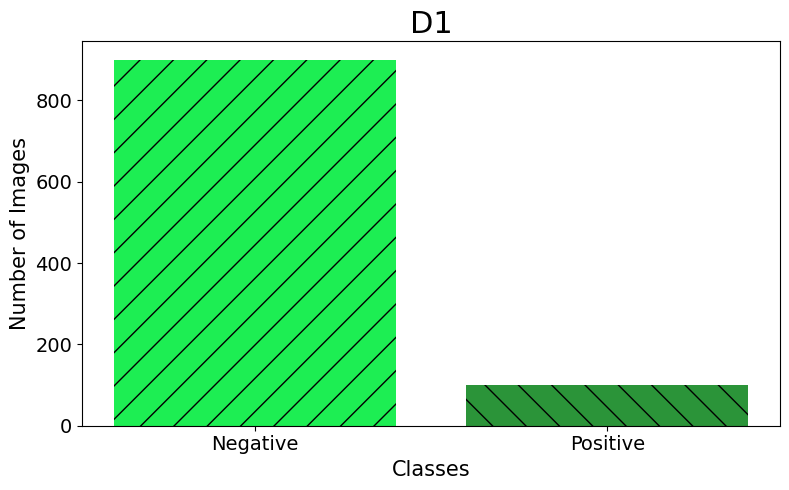

In [5]:
import os
import matplotlib.pyplot as plt
from torchvision import transforms
from PIL import Image
import os
import itertools
import random
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle
import cv2
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from tqdm import tqdm
import torchvision.transforms as transforms
from torchvision import models
from torchvision.datasets import ImageFolder
# ignore the warnings
import warnings
warnings.filterwarnings('ignore')

# Define the path to your dataset directory
dataset_path = "/kaggle/input/dip-d3/Detecting Mycobacterium tuberculosis Bacilli from TB Smear Images"

plt.style.use('default')

# Get the list of categories (subfolder names)
categories = [folder for folder in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, folder))]

# Count the number of images in each category
image_counts = []
for category in categories:
    category_path = os.path.join(dataset_path, category)
    image_files = [file for file in os.listdir(category_path) if file.lower().endswith(('png', 'jpg', 'jpeg', 'bmp', 'tiff'))]
    image_counts.append(len(image_files))

# Create a dataframe to show the number of images per class
data = pd.DataFrame({"Class": categories, "Number of Images": image_counts})
print(data)


# Create a bar chart to visualize the number of images in each category
plt.figure(figsize=(8, 5))
patterns = ["/", "\\", "|", "-", "+", "x", "o", "*"]  # Define patterns for bars
colors = ["#" + ''.join(random.choices('0123456789ABCDEF', k=6)) for _ in categories]  # Generate unique colors
bars = plt.bar(categories, image_counts, color=colors)
for bar, pattern in zip(bars, patterns):
    bar.set_hatch(pattern)

plt.title("D1", fontsize=22)
plt.xlabel("Classes", fontsize=15)
plt.ylabel("Number of Images", fontsize=15)
plt.xticks(rotation=0, fontsize=14)
plt.yticks(fontsize=14)
plt.tight_layout()
plt.savefig('before_augmentation.png', format='png', dpi=600)
plt.show()


          Class  Number of Images
0        Nomral              1500
1  Tuberculosis              1500


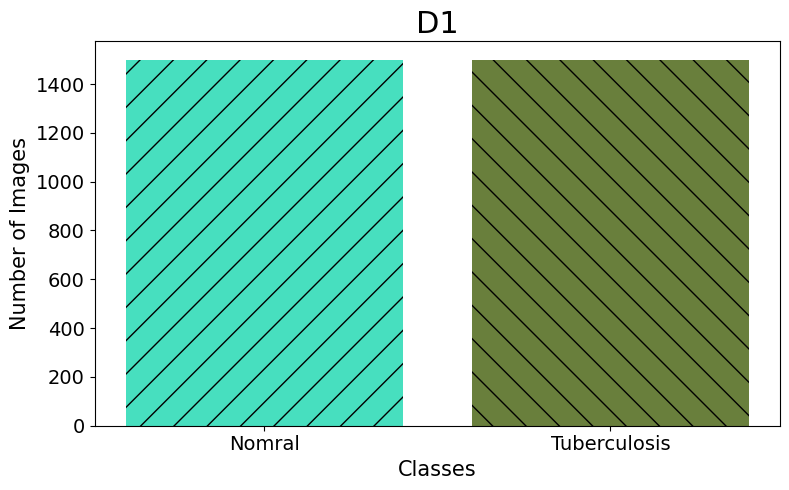

In [6]:
import os
import matplotlib.pyplot as plt
from torchvision import transforms
from PIL import Image
import os
import itertools
import random
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle
import cv2
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from tqdm import tqdm
import torchvision.transforms as transforms
from torchvision import models
from torchvision.datasets import ImageFolder
# ignore the warnings
import warnings
warnings.filterwarnings('ignore')

# Define the path to your dataset directory
dataset_path = "/kaggle/working/Augmented"

plt.style.use('default')

# Get the list of categories (subfolder names)
categories = [folder for folder in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, folder))]

# Count the number of images in each category
image_counts = []
for category in categories:
    category_path = os.path.join(dataset_path, category)
    image_files = [file for file in os.listdir(category_path) if file.lower().endswith(('png', 'jpg', 'jpeg', 'bmp', 'tiff'))]
    image_counts.append(len(image_files))

# Create a dataframe to show the number of images per class
data = pd.DataFrame({"Class": categories, "Number of Images": image_counts})
print(data)


# Create a bar chart to visualize the number of images in each category
plt.figure(figsize=(8, 5))
patterns = ["/", "\\", "|", "-", "+", "x", "o", "*"]  # Define patterns for bars
colors = ["#" + ''.join(random.choices('0123456789ABCDEF', k=6)) for _ in categories]  # Generate unique colors
bars = plt.bar(categories, image_counts, color=colors)
for bar, pattern in zip(bars, patterns):
    bar.set_hatch(pattern)

plt.title("D1", fontsize=22)
plt.xlabel("Classes", fontsize=15)
plt.ylabel("Number of Images", fontsize=15)
plt.xticks(rotation=0, fontsize=14)
plt.yticks(fontsize=14)
plt.tight_layout()
plt.savefig('after_augmentation.png', format='png', dpi=600)
plt.show()


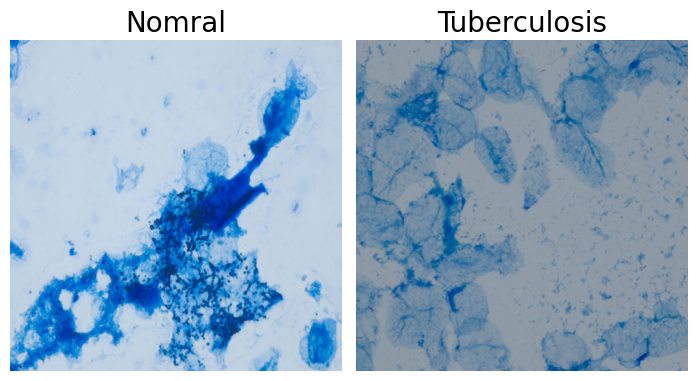

In [7]:
# Get the list of categories (subfolder names)
categories = [folder for folder in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, folder))]

# Define a transform to resize images and convert them to tensors
transform = transforms.Compose([
    transforms.Resize((512, 512)),  # Resize images to 512x512 for uniformity
    transforms.ToTensor()
])

# Initialize a figure for visualization
plt.figure(figsize=(14, 4))  # Adjusted figure size for better clarity with 2 rows and 4 columns

for i, category in enumerate(categories):
    # Get the path of the category folder
    category_path = os.path.join(dataset_path, category)

    # Get the list of image files in the category folder
    image_files = [file for file in os.listdir(category_path) if file.lower().endswith(('png', 'jpg', 'jpeg', 'bmp', 'tiff'))]

    # Ensure there is at least one image in the category
    if not image_files:
        print(f"No images found in category: {category}")
        continue

    # Randomly select an image from the category
    image_path = os.path.join(category_path, random.choice(image_files))
    image = Image.open(image_path).convert("RGB")

    # Apply the transform
    image = transform(image)

    # Convert the tensor back to a PIL image for visualization
    image = transforms.ToPILImage()(image)

    # Add the image to the plot
    plt.subplot(1, 4, i + 1)  # Updated to 2 rows and 4 columns
    plt.imshow(image)
    plt.title(category, fontsize=20)  # Increased font size for category labels
    plt.axis('off')

# Adjust layout and display the plot
plt.tight_layout()
plt.savefig('D3sample.png', format='png', dpi=600)
plt.show()

# Training

In [8]:
import os
import itertools

import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle
import cv2
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from tqdm import tqdm
import torchvision.transforms as transforms
from torchvision import models
from torchvision.datasets import ImageFolder
# ignore the warnings
import warnings
warnings.filterwarnings('ignore')

In [9]:
data_dir = "/kaggle/working/Augmented"

In [10]:
# Custom dataset loader for image data
class CustomImageDataset(Dataset):
    def __init__(self, filepaths, labels, transform=None):
        self.filepaths = filepaths
        self.labels = labels
        self.transform = transform
    
    def __len__(self):
        return len(self.filepaths)
    
    def __getitem__(self, idx):
        image = cv2.imread(self.filepaths[idx])
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        label = self.labels[idx]
        
        if self.transform:
            image = self.transform(image)
        
        return image, label

# Load data

def loading_the_data(data_dir):
    filepaths = []
    labels = []

    folds = os.listdir(data_dir)

    for fold in folds:
        foldpath = os.path.join(data_dir, fold)
        filelist = os.listdir(foldpath)
        for file in filelist:
            fpath = os.path.join(foldpath, file)
            
            filepaths.append(fpath)
            labels.append(fold)

    return pd.DataFrame({"filepaths": filepaths, "labels": labels})

# data_dir = "F:\\Ml files\\XAI\\Grape\\Combined (D4)"
df = loading_the_data(data_dir)

          Class  Number of Images
0        Nomral              1500
1  Tuberculosis              1500


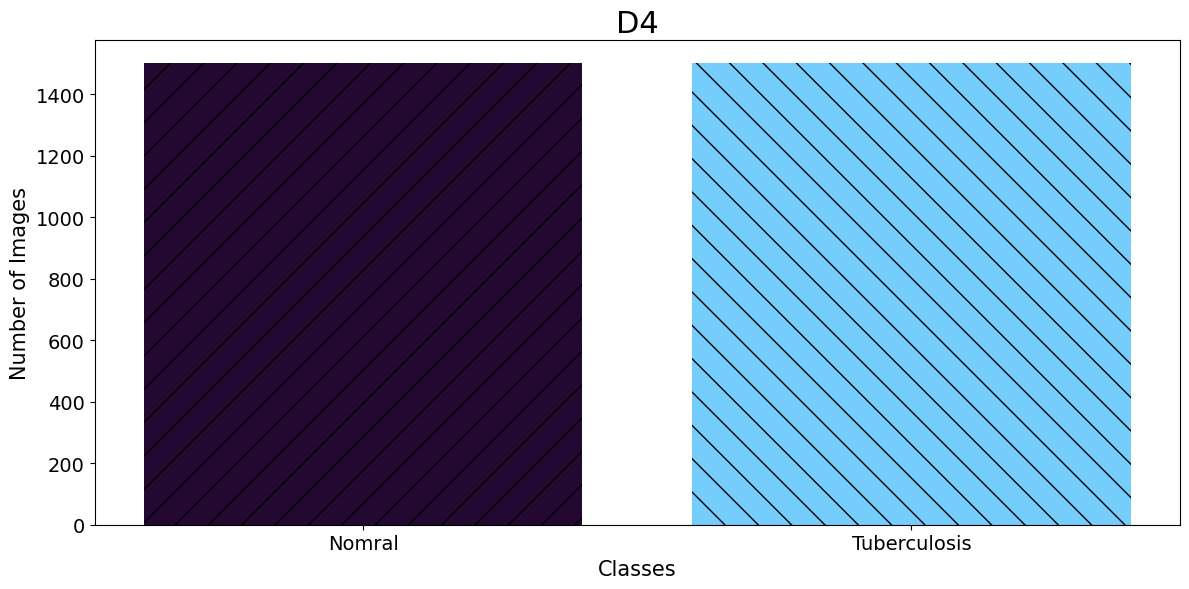

In [11]:
import random
plt.style.use('default')

# Get the list of categories (subfolder names)
categories = [folder for folder in os.listdir(data_dir) if os.path.isdir(os.path.join(data_dir, folder))]

# Count the number of images in each category
image_counts = []
for category in categories:
    category_path = os.path.join(data_dir, category)
    image_files = [file for file in os.listdir(category_path) if file.lower().endswith(('png', 'jpg', 'jpeg', 'bmp', 'tiff'))]
    image_counts.append(len(image_files))

# Create a dataframe to show the number of images per class
data = pd.DataFrame({"Class": categories, "Number of Images": image_counts})
print(data)


# Create a bar chart to visualize the number of images in each category
plt.figure(figsize=(12, 6))
patterns = ["/", "\\", "|", "-", "+", "x", "o", "*"]  # Define patterns for bars
colors = ["#" + ''.join(random.choices('0123456789ABCDEF', k=6)) for _ in categories]  # Generate unique colors
bars = plt.bar(categories, image_counts, color=colors)
for bar, pattern in zip(bars, patterns):
    bar.set_hatch(pattern)

plt.title("D4", fontsize=22)
plt.xlabel("Classes", fontsize=15)
plt.ylabel("Number of Images", fontsize=15)
plt.xticks(rotation=0, fontsize=14)
plt.yticks(fontsize=14)
plt.tight_layout()
plt.savefig('D1_barchart.png', format='png', dpi=600)
plt.show()

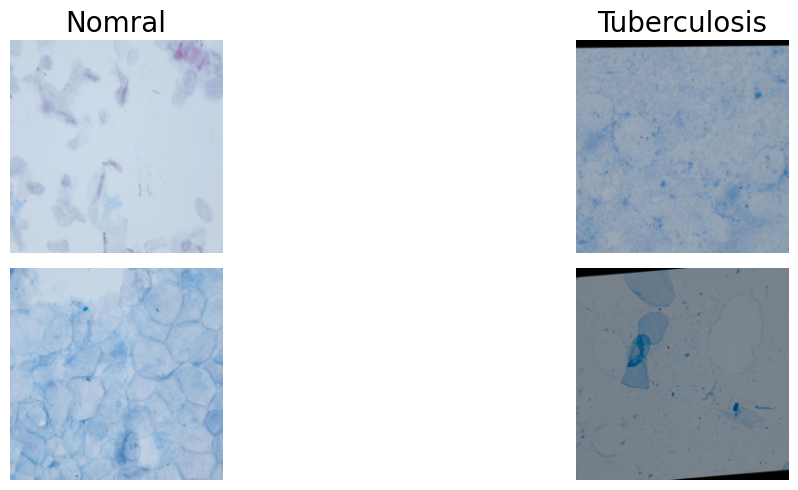

In [12]:
from PIL import Image

# Define a transform to resize images and convert them to tensors
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize images to 512x512 for uniformity
    transforms.ToTensor()
])

# Number of rows and columns
rows, cols = 2, 2

# Ensure categories list contains at least `cols` categories
if len(categories) < cols:
    raise ValueError("Not enough categories to display.")

# Initialize a figure for visualization
plt.figure(figsize=(15, 5))  # Adjusted figure size for better clarity with 2 rows and 5 columns

# Iterate twice to create two rows with different images from the same categories
for row in range(rows):
    for col, category in enumerate(categories[:cols]):  # Use the first `cols` categories
        # Get the path of the category folder
        category_path = os.path.join(data_dir, category)

        # Get the list of image files in the category folder
        image_files = [file for file in os.listdir(category_path) if file.lower().endswith(('png', 'jpg', 'jpeg', 'bmp', 'tiff'))]

        # Ensure there is at least one image in the category
        if not image_files:
            print(f"No images found in category: {category}")
            continue

        # Randomly select an image from the category
        image_path = os.path.join(category_path, random.choice(image_files))
        image = Image.open(image_path).convert("RGB")

        # Apply the transform
        image = transform(image)

        # Convert the tensor back to a PIL image for visualization
        image = transforms.ToPILImage()(image)

        # Add the image to the plot
        plt.subplot(rows, cols, row * cols + col + 1)
        plt.imshow(image)
        
        # Set title only for the first row
        if row == 0:
            plt.title(category, fontsize=20)
        
        plt.axis('off')

# Adjust layout and display the plot
plt.tight_layout()
plt.savefig('D1 sample.png', format='png', dpi=600)
plt.show()

In [13]:
# Data transformation
data_transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

In [14]:
# Splitting data
train_df, temp_df = train_test_split(df, test_size=0.2, stratify=df['labels'], random_state=42)  # 80% train, 20% temp
val_df, test_df = train_test_split(temp_df, test_size=0.75, stratify=temp_df['labels'], random_state=42)  # 75% of temp (15% of total) for test

In [15]:
print(train_df.shape)
print(val_df.shape)
print(test_df.shape)

(2400, 2)
(150, 2)
(450, 2)


In [16]:
import pandas as pd

# Assuming train_df, val_df, and test_df have a 'labels' column
train_counts = train_df['labels'].value_counts()
val_counts = val_df['labels'].value_counts()
test_counts = test_df['labels'].value_counts()

# Combine into a single DataFrame
class_counts = pd.DataFrame({
    'Training': train_counts,
    'Validation': val_counts,
    'Testing': test_counts
}).fillna(0).astype(int)  # Fill NaN with 0 and convert to integer

# Add a column for total counts (optional)
class_counts['Total'] = class_counts.sum(axis=1)

# Display the table
print(class_counts)


              Training  Validation  Testing  Total
labels                                            
Nomral            1200          75      225   1500
Tuberculosis      1200          75      225   1500


In [17]:
# Encoding labels
label_mapping = {label: idx for idx, label in enumerate(df['labels'].unique())}
train_labels = train_df['labels'].map(label_mapping).values
val_labels = val_df['labels'].map(label_mapping).values
test_labels = test_df['labels'].map(label_mapping).values

# Creating datasets and loaders
train_dataset = CustomImageDataset(train_df['filepaths'].values, train_labels, transform=data_transform)
val_dataset = CustomImageDataset(val_df['filepaths'].values, val_labels, transform=data_transform)
test_dataset = CustomImageDataset(test_df['filepaths'].values, test_labels, transform=data_transform)

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True, num_workers=0, pin_memory=True)
val_loader = DataLoader(val_dataset, batch_size=16, shuffle=False, num_workers=0, pin_memory=True)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False, num_workers=0, pin_memory=True)

In [18]:
# Model setup
if not torch.cuda.is_available():
    raise RuntimeError('CUDA device is not available. Please ensure a GPU is available to train the model.')
device = torch.device('cuda')
device

device(type='cuda')

# Resnext 50

In [19]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models

# Check device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load the pretrained ResNeXt-50 model
model = models.resnext50_32x4d(pretrained=True)

# Get the number of input features from the original classifier
num_ftrs = model.fc.in_features

# Replace the classifier (fully connected layer) with a new one
model.fc = nn.Sequential(
    nn.Linear(num_ftrs, 512),
    nn.ReLU(),
    nn.Dropout(0.4),
    nn.Linear(512, len(label_mapping)),  # Adjust output layer to the number of classes
    nn.LogSoftmax(dim=1)
)

# Move the model to the specified device
model = model.to(device)

# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

print("Model initialized and ready for training!")


Downloading: "https://download.pytorch.org/models/resnext50_32x4d-7cdf4587.pth" to /root/.cache/torch/hub/checkpoints/resnext50_32x4d-7cdf4587.pth
100%|██████████| 95.8M/95.8M [00:00<00:00, 202MB/s]


Model initialized and ready for training!


Epoch 1/20
----------


Validation Loss: 0.1138, Validation Accuracy: 0.9733
Epoch 1/20, Loss: 0.4416, Accuracy: 0.8200
Epoch 2/20
----------


Validation Loss: 0.2364, Validation Accuracy: 0.9267
Epoch 2/20, Loss: 0.2553, Accuracy: 0.9113
Epoch 3/20
----------


Validation Loss: 0.1188, Validation Accuracy: 0.9467
Epoch 3/20, Loss: 0.1914, Accuracy: 0.9363
Epoch 4/20
----------


Validation Loss: 0.0354, Validation Accuracy: 0.9933
Epoch 4/20, Loss: 0.1507, Accuracy: 0.9492
Epoch 5/20
----------


Validation Loss: 0.1001, Validation Accuracy: 0.9533
Epoch 5/20, Loss: 0.1409, Accuracy: 0.9525
Epoch 6/20
----------


Validation Loss: 0.1639, Validation Accuracy: 0.9667
Epoch 6/20, Loss: 0.1240, Accuracy: 0.9542
Epoch 7/20
----------


Validation Loss: 0.0727, Validation Accuracy: 0.9800
Epoch 7/20, Loss: 0.0851, Accuracy: 0.9700
Epoch 8/20
----------


Validation Loss: 0.0385, Validation Accuracy: 0.9800
Epoch 8/20, Loss: 0.0632, Accuracy: 0.9758
Epoch 9/20
----------


Validation Loss: 0.0419, Validation Accuracy: 0.9867
Epoch 9/20, Loss: 0.0471, Accuracy: 0.9829
Epoch 10/20
----------


Validation Loss: 0.0091, Validation Accuracy: 1.0000
Epoch 10/20, Loss: 0.0701, Accuracy: 0.9762
Epoch 11/20
----------


Validation Loss: 0.0211, Validation Accuracy: 1.0000
Epoch 11/20, Loss: 0.0331, Accuracy: 0.9888
Epoch 12/20
----------


Validation Loss: 0.0056, Validation Accuracy: 1.0000
Epoch 12/20, Loss: 0.0359, Accuracy: 0.9867
Epoch 13/20
----------


Validation Loss: 0.0175, Validation Accuracy: 1.0000
Epoch 13/20, Loss: 0.0528, Accuracy: 0.9846
Epoch 14/20
----------


Validation Loss: 0.0125, Validation Accuracy: 0.9933
Epoch 14/20, Loss: 0.0499, Accuracy: 0.9850
Epoch 15/20
----------


Validation Loss: 0.0465, Validation Accuracy: 0.9867
Epoch 15/20, Loss: 0.0406, Accuracy: 0.9858
Epoch 16/20
----------


Validation Loss: 0.0203, Validation Accuracy: 0.9933
Epoch 16/20, Loss: 0.0499, Accuracy: 0.9854
Epoch 17/20
----------


Validation Loss: 0.0015, Validation Accuracy: 1.0000
Epoch 17/20, Loss: 0.0228, Accuracy: 0.9929
Epoch 18/20
----------


Validation Loss: 0.0309, Validation Accuracy: 0.9867
Epoch 18/20, Loss: 0.0282, Accuracy: 0.9900
Epoch 19/20
----------


Validation Loss: 0.0407, Validation Accuracy: 0.9933
Epoch 19/20, Loss: 0.0374, Accuracy: 0.9883
Epoch 20/20
----------


Validation Loss: 0.0499, Validation Accuracy: 0.9933
Epoch 20/20, Loss: 0.0090, Accuracy: 0.9971


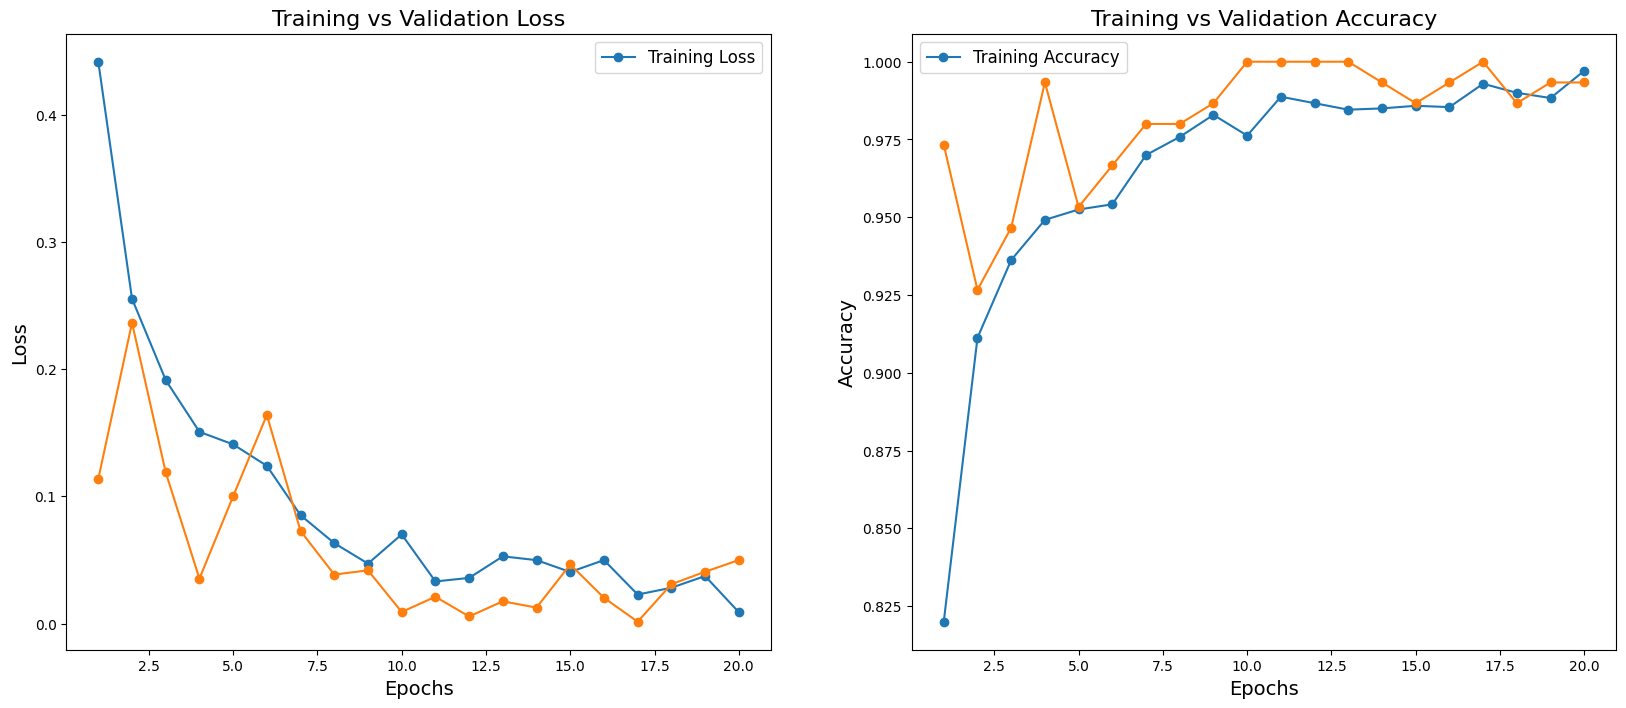

In [20]:
# Training function with learning curve
def train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs=20):
    model.train()
    train_losses = []
    train_accuracies = []
    val_losses= []
    val_accuracies = []
    
    for epoch in range(num_epochs):
        model.train()
        print(f'Epoch {epoch+1}/{num_epochs}')
        print('-' * 10)
        running_loss = 0.0
        correct = 0
        total = 0
        for inputs, labels in tqdm(train_loader, desc='Training', leave=False):
            inputs, labels = inputs.to(device), labels.to(device)
            
            optimizer.zero_grad()
            
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            
            running_loss += loss.item() * inputs.size(0)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
        
        epoch_loss = running_loss / len(train_loader.dataset)
        epoch_acc = correct / total
        train_losses.append(epoch_loss)
        train_accuracies.append(epoch_acc)
        
        # Validation phase
        model.eval()
        val_running_loss = 0.0
        val_correct = 0
        val_total = 0
        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                val_running_loss += loss.item() * inputs.size(0)
                _, predicted = torch.max(outputs, 1)
                val_total += labels.size(0)
                val_correct += (predicted == labels).sum().item()
        
        val_loss = val_running_loss / len(val_loader.dataset)
        val_acc = val_correct / val_total
        val_losses.append(val_loss)
        val_accuracies.append(val_acc)
        print(f'Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_acc:.4f}')
        print(f'Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss:.4f}, Accuracy: {epoch_acc:.4f}')
    
    # Plot learning curve
    plt.figure(figsize=(20, 8))
    plt.subplot(1, 2, 1)
    plt.plot(range(1, num_epochs + 1), train_losses, marker='o', label='Training Loss')
    plt.xlabel('Epochs', fontsize=14)
    plt.ylabel('Loss', fontsize=14)
    plt.legend(fontsize=12)
    plt.title('Training vs Validation Loss', fontsize=16)
    plt.plot(range(1, num_epochs + 1), val_losses, marker='o', label='Validation Loss')
    
    plt.subplot(1, 2, 2)
    plt.plot(range(1, num_epochs + 1), train_accuracies, marker='o', label='Training Accuracy')
    plt.xlabel('Epochs', fontsize=14)
    plt.ylabel('Accuracy', fontsize=14)
    plt.legend(fontsize=12)
    plt.title('Training vs Validation Accuracy', fontsize=16)
    plt.plot(range(1, num_epochs + 1), val_accuracies, marker='o', label='Validation Accuracy')
    plt.show()

# Train the model
train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs=20)

Confusion Matrix:
[[74  1]
 [ 0 75]]


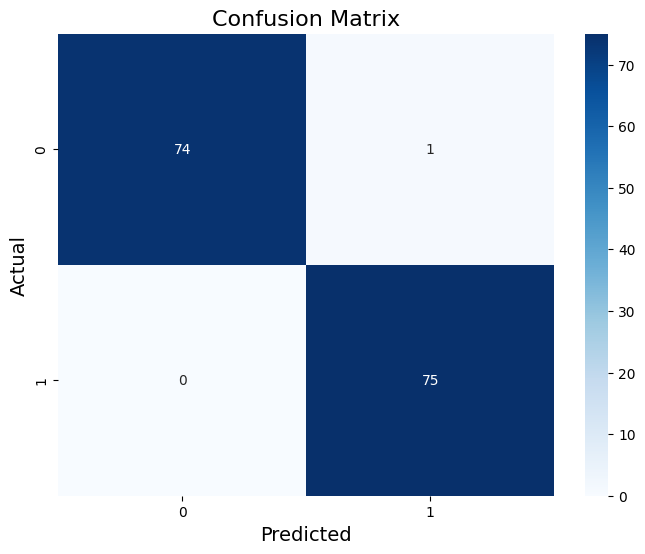

Specificity: 0.9867
Matthews Correlation Coefficient (MCC): 0.9868
F1 Score: 0.9933
PR AUC: 0.9995

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99        75
           1       0.99      1.00      0.99        75

    accuracy                           0.99       150
   macro avg       0.99      0.99      0.99       150
weighted avg       0.99      0.99      0.99       150



In [21]:
from sklearn.metrics import classification_report, confusion_matrix, matthews_corrcoef, f1_score, precision_recall_curve, auc
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def evaluate_model(model, data_loader):
    model.eval()
    all_labels = []
    all_preds = []
    all_probs = []

    # Try to fetch class names from dataset
    try:
        class_names = data_loader.dataset.classes
    except AttributeError:
        class_names = None

    with torch.no_grad():
        for inputs, labels in data_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            probs = torch.softmax(outputs, dim=1)  # Use softmax for multi-class
            _, predicted = torch.max(outputs, 1)

            all_labels.extend(labels.cpu().numpy())
            all_preds.extend(predicted.cpu().numpy())

            # For PR-AUC: assuming binary — take class 1 probability
            if probs.shape[1] == 2:
                all_probs.extend(probs[:, 1].cpu().numpy())
            else:
                all_probs.extend(probs.cpu().numpy())  # Multi-class: you can adjust this

    all_labels = np.array(all_labels)
    all_preds = np.array(all_preds)

    # --- Confusion Matrix ---
    cm = confusion_matrix(all_labels, all_preds)
    print("Confusion Matrix:")
    print(cm)

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names if class_names else np.arange(len(cm)),
                yticklabels=class_names if class_names else np.arange(len(cm)))
    plt.ylabel('Actual', fontsize=14)
    plt.xlabel('Predicted', fontsize=14)
    plt.title('Confusion Matrix', fontsize=16)
    plt.show()

    # --- Specificity ---
    if cm.shape == (2, 2):
        tn, fp, fn, tp = cm.ravel()
        specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
        print(f"Specificity: {specificity:.4f}")
    else:
        print("Specificity is only defined for binary classification.")

    # --- Matthews Correlation Coefficient ---
    mcc = matthews_corrcoef(all_labels, all_preds)
    print(f"Matthews Correlation Coefficient (MCC): {mcc:.4f}")

    # --- F1 Score ---
    f1 = f1_score(all_labels, all_preds, average='weighted')
    print(f"F1 Score: {f1:.4f}")

    # --- PR AUC ---
    if len(np.unique(all_labels)) == 2:
        precision, recall, _ = precision_recall_curve(all_labels, np.array(all_probs))
        pr_auc = auc(recall, precision)
        print(f"PR AUC: {pr_auc:.4f}")
    else:
        print("PR AUC is usually computed for binary classification.")

    # --- Classification Report ---
    report = classification_report(all_labels, all_preds, target_names=class_names if class_names else None)
    print("\nClassification Report:\n", report)
    
evaluate_model(model, val_loader)

In [22]:
# Save the model
torch.save(model.state_dict(), "resnext50.pth")

In [23]:
model_resnetx50 = model

# DenseNet-201

In [24]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models

# Check device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load the pretrained DenseNet-201 model
model = models.densenet201(pretrained=True)

# Get the number of input features from the original classifier
num_ftrs = model.classifier.in_features  # DenseNet uses a `classifier` instead of `fc`

# Replace the classifier (fully connected layer) with a new one
model.classifier = nn.Sequential(
    nn.Linear(num_ftrs, 512),
    nn.ReLU(),
    nn.Dropout(0.4),
    nn.Linear(512, len(label_mapping)),  # Adjust output layer to the number of classes
    nn.LogSoftmax(dim=1)
)

# Move the model to the specified device
model = model.to(device)

# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

print("DenseNet-201 model initialized and ready for training!")


Downloading: "https://download.pytorch.org/models/densenet201-c1103571.pth" to /root/.cache/torch/hub/checkpoints/densenet201-c1103571.pth
100%|██████████| 77.4M/77.4M [00:00<00:00, 178MB/s]


DenseNet-201 model initialized and ready for training!


Epoch 1/20
----------


Validation Loss: 0.9475, Validation Accuracy: 0.7267
Epoch 1/20, Loss: 0.5010, Accuracy: 0.7758
Epoch 2/20
----------


Validation Loss: 0.2895, Validation Accuracy: 0.8933
Epoch 2/20, Loss: 0.4657, Accuracy: 0.7908
Epoch 3/20
----------


Validation Loss: 0.2914, Validation Accuracy: 0.8667
Epoch 3/20, Loss: 0.4165, Accuracy: 0.8217
Epoch 4/20
----------


Validation Loss: 0.2174, Validation Accuracy: 0.9067
Epoch 4/20, Loss: 0.3749, Accuracy: 0.8508
Epoch 5/20
----------


Validation Loss: 0.1796, Validation Accuracy: 0.9133
Epoch 5/20, Loss: 0.2922, Accuracy: 0.8771
Epoch 6/20
----------


Validation Loss: 0.1699, Validation Accuracy: 0.9467
Epoch 6/20, Loss: 0.2781, Accuracy: 0.8888
Epoch 7/20
----------


Validation Loss: 0.1241, Validation Accuracy: 0.9600
Epoch 7/20, Loss: 0.2317, Accuracy: 0.9179
Epoch 8/20
----------


Validation Loss: 0.0953, Validation Accuracy: 0.9667
Epoch 8/20, Loss: 0.2573, Accuracy: 0.9062
Epoch 9/20
----------


Validation Loss: 0.0847, Validation Accuracy: 0.9733
Epoch 9/20, Loss: 0.1877, Accuracy: 0.9308
Epoch 10/20
----------


Validation Loss: 0.0962, Validation Accuracy: 0.9667
Epoch 10/20, Loss: 0.1818, Accuracy: 0.9329
Epoch 11/20
----------


Validation Loss: 0.0506, Validation Accuracy: 0.9867
Epoch 11/20, Loss: 0.1689, Accuracy: 0.9442
Epoch 12/20
----------


Validation Loss: 0.1149, Validation Accuracy: 0.9533
Epoch 12/20, Loss: 0.1364, Accuracy: 0.9446
Epoch 13/20
----------


Validation Loss: 0.0596, Validation Accuracy: 0.9933
Epoch 13/20, Loss: 0.1189, Accuracy: 0.9583
Epoch 14/20
----------


Validation Loss: 0.0916, Validation Accuracy: 0.9667
Epoch 14/20, Loss: 0.1136, Accuracy: 0.9558
Epoch 15/20
----------


Validation Loss: 0.1254, Validation Accuracy: 0.9400
Epoch 15/20, Loss: 0.1000, Accuracy: 0.9667
Epoch 16/20
----------


Validation Loss: 0.0579, Validation Accuracy: 0.9667
Epoch 16/20, Loss: 0.0843, Accuracy: 0.9704
Epoch 17/20
----------


Validation Loss: 0.0937, Validation Accuracy: 0.9600
Epoch 17/20, Loss: 0.0885, Accuracy: 0.9692
Epoch 18/20
----------


Validation Loss: 0.0639, Validation Accuracy: 0.9800
Epoch 18/20, Loss: 0.0836, Accuracy: 0.9708
Epoch 19/20
----------


Validation Loss: 0.1003, Validation Accuracy: 0.9667
Epoch 19/20, Loss: 0.0748, Accuracy: 0.9750
Epoch 20/20
----------


Validation Loss: 0.0988, Validation Accuracy: 0.9667
Epoch 20/20, Loss: 0.0555, Accuracy: 0.9792


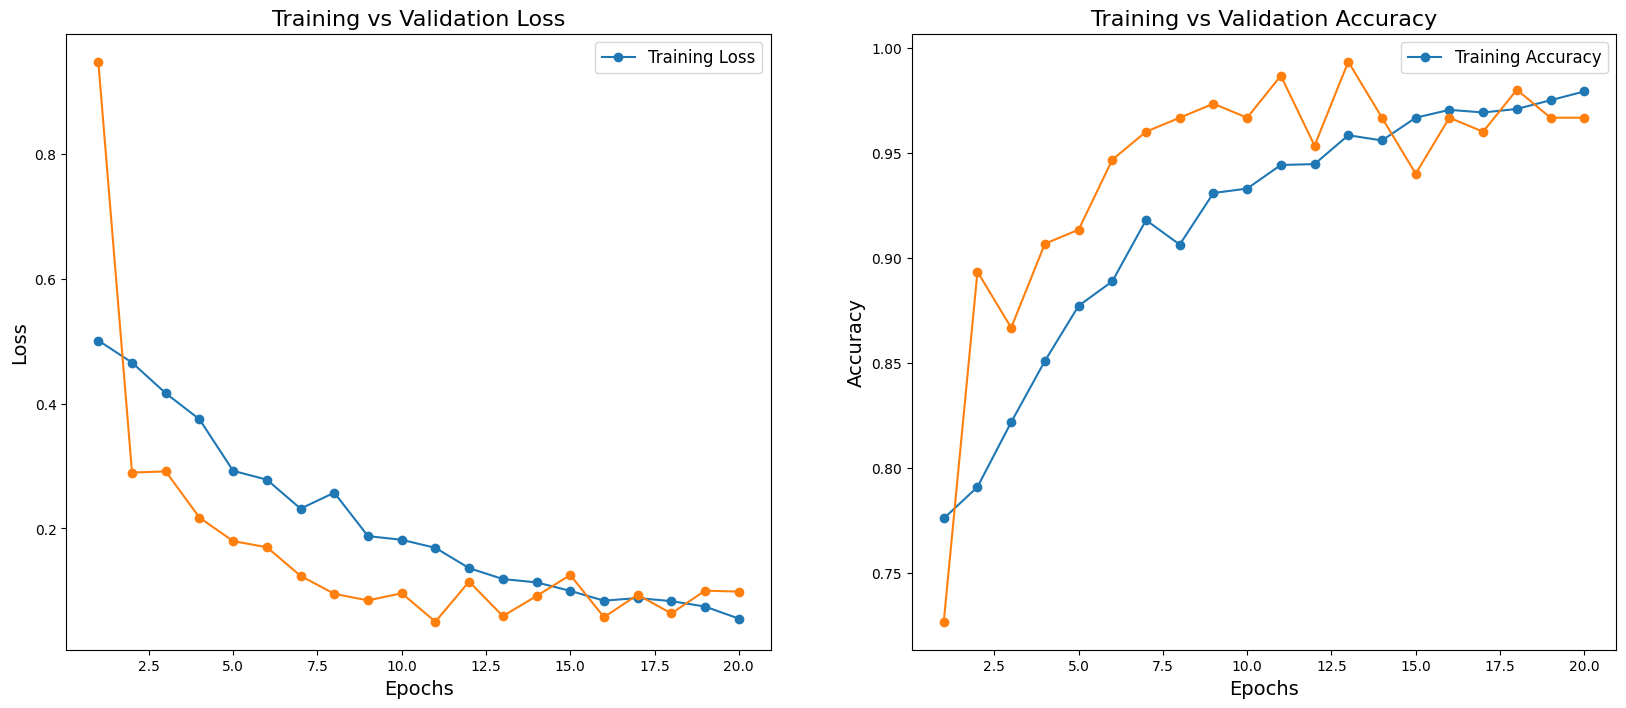

In [25]:
# Training function with learning curve
def train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs=20):
    model.train()
    train_losses = []
    train_accuracies = []
    val_losses= []
    val_accuracies = []
    
    for epoch in range(num_epochs):
        model.train()
        print(f'Epoch {epoch+1}/{num_epochs}')
        print('-' * 10)
        running_loss = 0.0
        correct = 0
        total = 0
        for inputs, labels in tqdm(train_loader, desc='Training', leave=False):
            inputs, labels = inputs.to(device), labels.to(device)
            
            optimizer.zero_grad()
            
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            
            running_loss += loss.item() * inputs.size(0)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
        
        epoch_loss = running_loss / len(train_loader.dataset)
        epoch_acc = correct / total
        train_losses.append(epoch_loss)
        train_accuracies.append(epoch_acc)
        
        # Validation phase
        model.eval()
        val_running_loss = 0.0
        val_correct = 0
        val_total = 0
        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                val_running_loss += loss.item() * inputs.size(0)
                _, predicted = torch.max(outputs, 1)
                val_total += labels.size(0)
                val_correct += (predicted == labels).sum().item()
        
        val_loss = val_running_loss / len(val_loader.dataset)
        val_acc = val_correct / val_total
        val_losses.append(val_loss)
        val_accuracies.append(val_acc)
        print(f'Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_acc:.4f}')
        print(f'Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss:.4f}, Accuracy: {epoch_acc:.4f}')
    
    # Plot learning curve
    plt.figure(figsize=(20, 8))
    plt.subplot(1, 2, 1)
    plt.plot(range(1, num_epochs + 1), train_losses, marker='o', label='Training Loss')
    plt.xlabel('Epochs', fontsize=14)
    plt.ylabel('Loss', fontsize=14)
    plt.legend(fontsize=12)
    plt.title('Training vs Validation Loss', fontsize=16)
    plt.plot(range(1, num_epochs + 1), val_losses, marker='o', label='Validation Loss')
    
    plt.subplot(1, 2, 2)
    plt.plot(range(1, num_epochs + 1), train_accuracies, marker='o', label='Training Accuracy')
    plt.xlabel('Epochs', fontsize=14)
    plt.ylabel('Accuracy', fontsize=14)
    plt.legend(fontsize=12)
    plt.title('Training vs Validation Accuracy', fontsize=16)
    plt.plot(range(1, num_epochs + 1), val_accuracies, marker='o', label='Validation Accuracy')
    plt.show()

# Train the model
train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs=20)

Confusion Matrix:
[[73  2]
 [ 3 72]]


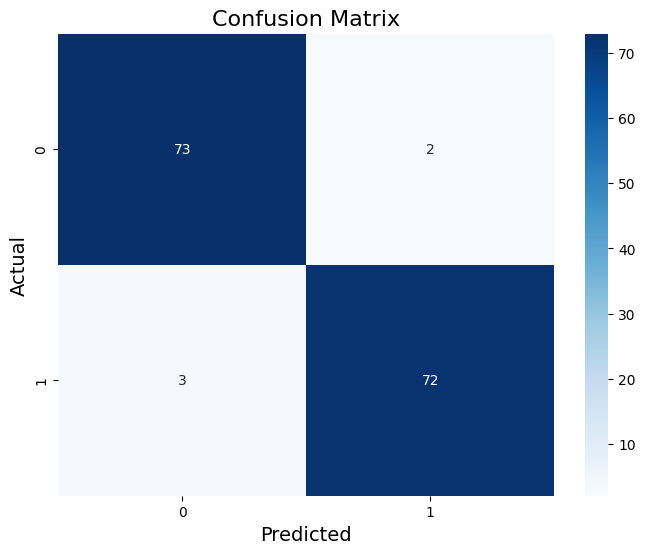

Specificity: 0.9733
Matthews Correlation Coefficient (MCC): 0.9334
F1 Score: 0.9667
PR AUC: 0.9953

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.97      0.97        75
           1       0.97      0.96      0.97        75

    accuracy                           0.97       150
   macro avg       0.97      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150



In [26]:
from sklearn.metrics import classification_report, confusion_matrix, matthews_corrcoef, f1_score, precision_recall_curve, auc
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def evaluate_model(model, data_loader):
    model.eval()
    all_labels = []
    all_preds = []
    all_probs = []

    # Try to fetch class names from dataset
    try:
        class_names = data_loader.dataset.classes
    except AttributeError:
        class_names = None

    with torch.no_grad():
        for inputs, labels in data_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            probs = torch.softmax(outputs, dim=1)  # Use softmax for multi-class
            _, predicted = torch.max(outputs, 1)

            all_labels.extend(labels.cpu().numpy())
            all_preds.extend(predicted.cpu().numpy())

            # For PR-AUC: assuming binary — take class 1 probability
            if probs.shape[1] == 2:
                all_probs.extend(probs[:, 1].cpu().numpy())
            else:
                all_probs.extend(probs.cpu().numpy())  # Multi-class: you can adjust this

    all_labels = np.array(all_labels)
    all_preds = np.array(all_preds)

    # --- Confusion Matrix ---
    cm = confusion_matrix(all_labels, all_preds)
    print("Confusion Matrix:")
    print(cm)

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names if class_names else np.arange(len(cm)),
                yticklabels=class_names if class_names else np.arange(len(cm)))
    plt.ylabel('Actual', fontsize=14)
    plt.xlabel('Predicted', fontsize=14)
    plt.title('Confusion Matrix', fontsize=16)
    plt.show()

    # --- Specificity ---
    if cm.shape == (2, 2):
        tn, fp, fn, tp = cm.ravel()
        specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
        print(f"Specificity: {specificity:.4f}")
    else:
        print("Specificity is only defined for binary classification.")

    # --- Matthews Correlation Coefficient ---
    mcc = matthews_corrcoef(all_labels, all_preds)
    print(f"Matthews Correlation Coefficient (MCC): {mcc:.4f}")

    # --- F1 Score ---
    f1 = f1_score(all_labels, all_preds, average='weighted')
    print(f"F1 Score: {f1:.4f}")

    # --- PR AUC ---
    if len(np.unique(all_labels)) == 2:
        precision, recall, _ = precision_recall_curve(all_labels, np.array(all_probs))
        pr_auc = auc(recall, precision)
        print(f"PR AUC: {pr_auc:.4f}")
    else:
        print("PR AUC is usually computed for binary classification.")

    # --- Classification Report ---
    report = classification_report(all_labels, all_preds, target_names=class_names if class_names else None)
    print("\nClassification Report:\n", report)
    
evaluate_model(model, val_loader)

In [27]:
# Save the model
torch.save(model.state_dict(), "densenet201.pth")

In [28]:
model_densenet201 = model

# ShuffleNet v2

In [29]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models

# Device setup
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load pretrained ShuffleNet v2 (1.0x output channels)
model = models.shufflenet_v2_x1_0(pretrained=True)

# Get the number of input features to the classifier
num_ftrs = model.fc.in_features  # For ShuffleNet, the classifier is `fc`

# Replace the classifier
model.fc = nn.Sequential(
    nn.Linear(num_ftrs, 512),
    nn.ReLU(),
    nn.Dropout(0.4),
    nn.Linear(512, len(label_mapping)),  # Use your actual number of classes
    nn.LogSoftmax(dim=1)
)

# Move model to device
model = model.to(device)

# Define loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

print("ShuffleNet v2 model (via torchvision) initialized and ready for training!")


Downloading: "https://download.pytorch.org/models/shufflenetv2_x1-5666bf0f80.pth" to /root/.cache/torch/hub/checkpoints/shufflenetv2_x1-5666bf0f80.pth
100%|██████████| 8.79M/8.79M [00:00<00:00, 36.3MB/s]

ShuffleNet v2 model (via torchvision) initialized and ready for training!


Epoch 1/20
----------


Validation Loss: 0.1970, Validation Accuracy: 0.9133
Epoch 1/20, Loss: 0.3111, Accuracy: 0.8667
Epoch 2/20
----------


Validation Loss: 0.0150, Validation Accuracy: 0.9933
Epoch 2/20, Loss: 0.1532, Accuracy: 0.9500
Epoch 3/20
----------


Validation Loss: 0.0510, Validation Accuracy: 0.9867
Epoch 3/20, Loss: 0.1035, Accuracy: 0.9654
Epoch 4/20
----------


Validation Loss: 0.0202, Validation Accuracy: 0.9933
Epoch 4/20, Loss: 0.0665, Accuracy: 0.9792
Epoch 5/20
----------


Validation Loss: 0.0161, Validation Accuracy: 1.0000
Epoch 5/20, Loss: 0.0652, Accuracy: 0.9779
Epoch 6/20
----------


Validation Loss: 0.0073, Validation Accuracy: 1.0000
Epoch 6/20, Loss: 0.0698, Accuracy: 0.9796
Epoch 7/20
----------


Validation Loss: 0.0228, Validation Accuracy: 0.9867
Epoch 7/20, Loss: 0.0373, Accuracy: 0.9850
Epoch 8/20
----------


Validation Loss: 0.0028, Validation Accuracy: 1.0000
Epoch 8/20, Loss: 0.0254, Accuracy: 0.9908
Epoch 9/20
----------


Validation Loss: 0.0174, Validation Accuracy: 0.9933
Epoch 9/20, Loss: 0.0571, Accuracy: 0.9833
Epoch 10/20
----------


Validation Loss: 0.0149, Validation Accuracy: 0.9933
Epoch 10/20, Loss: 0.0403, Accuracy: 0.9862
Epoch 11/20
----------


Validation Loss: 0.0053, Validation Accuracy: 1.0000
Epoch 11/20, Loss: 0.0252, Accuracy: 0.9912
Epoch 12/20
----------


Validation Loss: 0.0032, Validation Accuracy: 1.0000
Epoch 12/20, Loss: 0.0172, Accuracy: 0.9942
Epoch 13/20
----------


Validation Loss: 0.0042, Validation Accuracy: 1.0000
Epoch 13/20, Loss: 0.0524, Accuracy: 0.9850
Epoch 14/20
----------


Validation Loss: 0.0015, Validation Accuracy: 1.0000
Epoch 14/20, Loss: 0.0120, Accuracy: 0.9958
Epoch 15/20
----------


Validation Loss: 0.0117, Validation Accuracy: 0.9933
Epoch 15/20, Loss: 0.0269, Accuracy: 0.9925
Epoch 16/20
----------


Validation Loss: 0.0023, Validation Accuracy: 1.0000
Epoch 16/20, Loss: 0.0148, Accuracy: 0.9967
Epoch 17/20
----------


Validation Loss: 0.0174, Validation Accuracy: 0.9933
Epoch 17/20, Loss: 0.0222, Accuracy: 0.9938
Epoch 18/20
----------


Validation Loss: 0.0061, Validation Accuracy: 1.0000
Epoch 18/20, Loss: 0.0244, Accuracy: 0.9929
Epoch 19/20
----------


Validation Loss: 0.0016, Validation Accuracy: 1.0000
Epoch 19/20, Loss: 0.0223, Accuracy: 0.9929
Epoch 20/20
----------


Validation Loss: 0.0092, Validation Accuracy: 1.0000
Epoch 20/20, Loss: 0.0164, Accuracy: 0.9950


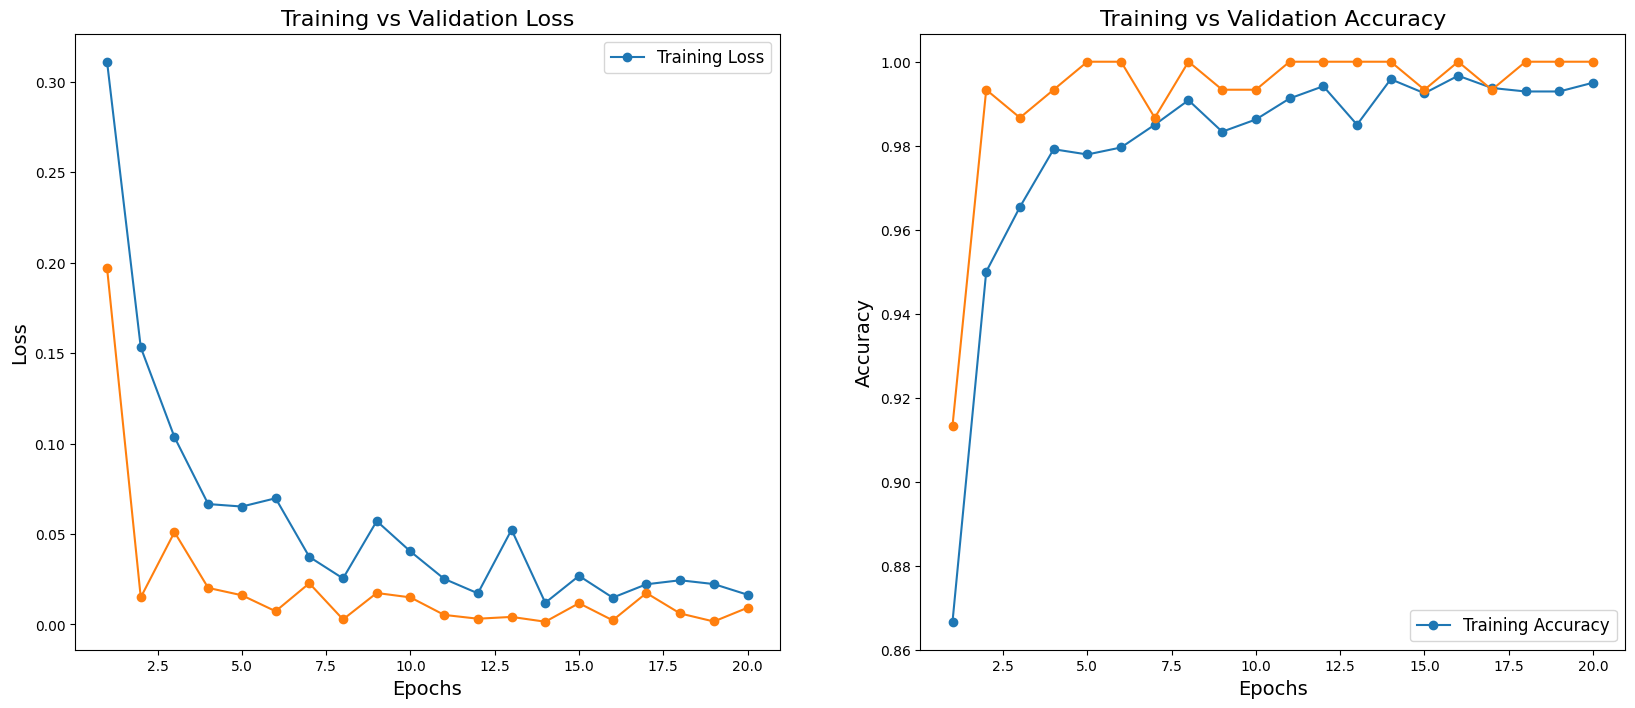

In [30]:
# Training function with learning curve
def train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs=20):
    model.train()
    train_losses = []
    train_accuracies = []
    val_losses= []
    val_accuracies = []
    
    for epoch in range(num_epochs):
        model.train()
        print(f'Epoch {epoch+1}/{num_epochs}')
        print('-' * 10)
        running_loss = 0.0
        correct = 0
        total = 0
        for inputs, labels in tqdm(train_loader, desc='Training', leave=False):
            inputs, labels = inputs.to(device), labels.to(device)
            
            optimizer.zero_grad()
            
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            
            running_loss += loss.item() * inputs.size(0)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
        
        epoch_loss = running_loss / len(train_loader.dataset)
        epoch_acc = correct / total
        train_losses.append(epoch_loss)
        train_accuracies.append(epoch_acc)
        
        # Validation phase
        model.eval()
        val_running_loss = 0.0
        val_correct = 0
        val_total = 0
        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                val_running_loss += loss.item() * inputs.size(0)
                _, predicted = torch.max(outputs, 1)
                val_total += labels.size(0)
                val_correct += (predicted == labels).sum().item()
        
        val_loss = val_running_loss / len(val_loader.dataset)
        val_acc = val_correct / val_total
        val_losses.append(val_loss)
        val_accuracies.append(val_acc)
        print(f'Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_acc:.4f}')
        print(f'Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss:.4f}, Accuracy: {epoch_acc:.4f}')
    
    # Plot learning curve
    plt.figure(figsize=(20, 8))
    plt.subplot(1, 2, 1)
    plt.plot(range(1, num_epochs + 1), train_losses, marker='o', label='Training Loss')
    plt.xlabel('Epochs', fontsize=14)
    plt.ylabel('Loss', fontsize=14)
    plt.legend(fontsize=12)
    plt.title('Training vs Validation Loss', fontsize=16)
    plt.plot(range(1, num_epochs + 1), val_losses, marker='o', label='Validation Loss')
    
    plt.subplot(1, 2, 2)
    plt.plot(range(1, num_epochs + 1), train_accuracies, marker='o', label='Training Accuracy')
    plt.xlabel('Epochs', fontsize=14)
    plt.ylabel('Accuracy', fontsize=14)
    plt.legend(fontsize=12)
    plt.title('Training vs Validation Accuracy', fontsize=16)
    plt.plot(range(1, num_epochs + 1), val_accuracies, marker='o', label='Validation Accuracy')
    plt.show()

# Train the model
train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs=20)

Confusion Matrix:
[[75  0]
 [ 0 75]]


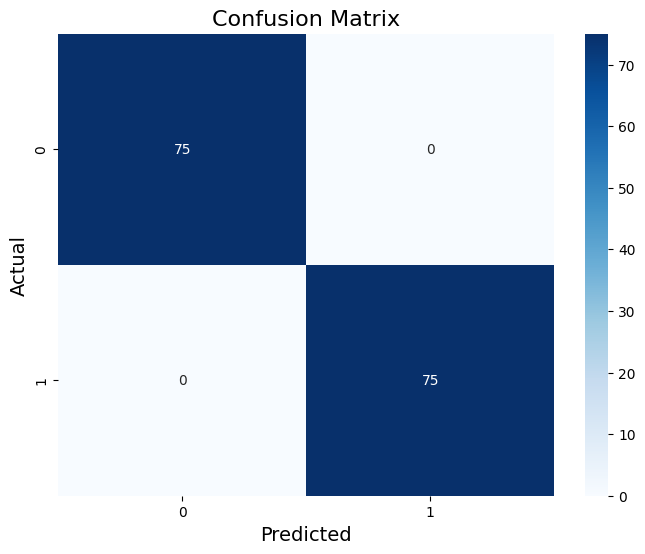

Specificity: 1.0000
Matthews Correlation Coefficient (MCC): 1.0000
F1 Score: 1.0000
PR AUC: 1.0000

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        75
           1       1.00      1.00      1.00        75

    accuracy                           1.00       150
   macro avg       1.00      1.00      1.00       150
weighted avg       1.00      1.00      1.00       150



In [31]:
from sklearn.metrics import classification_report, confusion_matrix, matthews_corrcoef, f1_score, precision_recall_curve, auc
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def evaluate_model(model, data_loader):
    model.eval()
    all_labels = []
    all_preds = []
    all_probs = []

    # Try to fetch class names from dataset
    try:
        class_names = data_loader.dataset.classes
    except AttributeError:
        class_names = None

    with torch.no_grad():
        for inputs, labels in data_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            probs = torch.softmax(outputs, dim=1)  # Use softmax for multi-class
            _, predicted = torch.max(outputs, 1)

            all_labels.extend(labels.cpu().numpy())
            all_preds.extend(predicted.cpu().numpy())

            # For PR-AUC: assuming binary — take class 1 probability
            if probs.shape[1] == 2:
                all_probs.extend(probs[:, 1].cpu().numpy())
            else:
                all_probs.extend(probs.cpu().numpy())  # Multi-class: you can adjust this

    all_labels = np.array(all_labels)
    all_preds = np.array(all_preds)

    # --- Confusion Matrix ---
    cm = confusion_matrix(all_labels, all_preds)
    print("Confusion Matrix:")
    print(cm)

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names if class_names else np.arange(len(cm)),
                yticklabels=class_names if class_names else np.arange(len(cm)))
    plt.ylabel('Actual', fontsize=14)
    plt.xlabel('Predicted', fontsize=14)
    plt.title('Confusion Matrix', fontsize=16)
    plt.show()

    # --- Specificity ---
    if cm.shape == (2, 2):
        tn, fp, fn, tp = cm.ravel()
        specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
        print(f"Specificity: {specificity:.4f}")
    else:
        print("Specificity is only defined for binary classification.")

    # --- Matthews Correlation Coefficient ---
    mcc = matthews_corrcoef(all_labels, all_preds)
    print(f"Matthews Correlation Coefficient (MCC): {mcc:.4f}")

    # --- F1 Score ---
    f1 = f1_score(all_labels, all_preds, average='weighted')
    print(f"F1 Score: {f1:.4f}")

    # --- PR AUC ---
    if len(np.unique(all_labels)) == 2:
        precision, recall, _ = precision_recall_curve(all_labels, np.array(all_probs))
        pr_auc = auc(recall, precision)
        print(f"PR AUC: {pr_auc:.4f}")
    else:
        print("PR AUC is usually computed for binary classification.")

    # --- Classification Report ---
    report = classification_report(all_labels, all_preds, target_names=class_names if class_names else None)
    print("\nClassification Report:\n", report)
    
evaluate_model(model, val_loader)

In [32]:
# Save the model
torch.save(model.state_dict(), "ShuffleNet_v2.pth")

In [33]:
model_ShuffleNet_v2 = model

# NASNet-Mobile

In [34]:
pip install pretrainedmodels

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 1.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pretrainedmodels: filename=pretrainedmodels-0.7.4-py3-none-any.whl size=60944 sha256=cbc02a15158cb300864f2a4183bccfd42768206ca1b61264e062bd5ad1afc63d
  Stored in directory: /root/.cache/pip/wheels/35/cb/a5/8f534c60142835bfc889f9a482e4a67e0b817032d9c6883b64
Successfully built pretrainedmodels
Note: you may need to restart the kernel to use updated packages.


In [35]:
import torch
import torch.nn as nn
import torch.optim as optim
from pretrainedmodels import nasnetamobile  # Third-party library

# Device setup
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load pretrained NASNet-Mobile
model = nasnetamobile(num_classes=1000, pretrained='imagenet')

# Get number of input features to the final layer
num_ftrs = model.last_linear.in_features

# Replace the final layer
model.last_linear = nn.Sequential(
    nn.Linear(num_ftrs, 512),
    nn.ReLU(),
    nn.Dropout(0.4),
    nn.Linear(512, len(label_mapping)),  # Use your actual number of classes
    nn.LogSoftmax(dim=1)
)

# Move model to device
model = model.to(device)

# Define loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

print("NASNet-Mobile model initialized and ready for training!")

Downloading: "http://data.lip6.fr/cadene/pretrainedmodels/nasnetamobile-7e03cead.pth" to /root/.cache/torch/hub/checkpoints/nasnetamobile-7e03cead.pth
100%|██████████| 20.5M/20.5M [00:01<00:00, 14.1MB/s]


NASNet-Mobile model initialized and ready for training!


Epoch 1/20
----------


Validation Loss: 0.1077, Validation Accuracy: 0.9667
Epoch 1/20, Loss: 0.3790, Accuracy: 0.8429
Epoch 2/20
----------


Validation Loss: 0.0906, Validation Accuracy: 0.9600
Epoch 2/20, Loss: 0.2385, Accuracy: 0.9179
Epoch 3/20
----------


Validation Loss: 0.0238, Validation Accuracy: 0.9933
Epoch 3/20, Loss: 0.1166, Accuracy: 0.9604
Epoch 4/20
----------


Validation Loss: 0.0584, Validation Accuracy: 0.9733
Epoch 4/20, Loss: 0.1070, Accuracy: 0.9667
Epoch 5/20
----------


Validation Loss: 0.0200, Validation Accuracy: 1.0000
Epoch 5/20, Loss: 0.1258, Accuracy: 0.9558
Epoch 6/20
----------


Validation Loss: 0.0819, Validation Accuracy: 0.9733
Epoch 6/20, Loss: 0.1312, Accuracy: 0.9600
Epoch 7/20
----------


Validation Loss: 0.0212, Validation Accuracy: 0.9933
Epoch 7/20, Loss: 0.0654, Accuracy: 0.9775
Epoch 8/20
----------


Validation Loss: 0.0222, Validation Accuracy: 0.9933
Epoch 8/20, Loss: 0.0336, Accuracy: 0.9917
Epoch 9/20
----------


Validation Loss: 0.0799, Validation Accuracy: 0.9600
Epoch 9/20, Loss: 0.0436, Accuracy: 0.9867
Epoch 10/20
----------


Validation Loss: 0.0077, Validation Accuracy: 1.0000
Epoch 10/20, Loss: 0.0345, Accuracy: 0.9883
Epoch 11/20
----------


Validation Loss: 0.0016, Validation Accuracy: 1.0000
Epoch 11/20, Loss: 0.0448, Accuracy: 0.9879
Epoch 12/20
----------


Validation Loss: 0.0037, Validation Accuracy: 1.0000
Epoch 12/20, Loss: 0.0285, Accuracy: 0.9929
Epoch 13/20
----------


Validation Loss: 0.0310, Validation Accuracy: 0.9800
Epoch 13/20, Loss: 0.0389, Accuracy: 0.9892
Epoch 14/20
----------


Validation Loss: 0.0010, Validation Accuracy: 1.0000
Epoch 14/20, Loss: 0.0294, Accuracy: 0.9875
Epoch 15/20
----------


Validation Loss: 0.0040, Validation Accuracy: 1.0000
Epoch 15/20, Loss: 0.0270, Accuracy: 0.9917
Epoch 16/20
----------


Validation Loss: 0.0019, Validation Accuracy: 1.0000
Epoch 16/20, Loss: 0.0141, Accuracy: 0.9967
Epoch 17/20
----------


Validation Loss: 0.0045, Validation Accuracy: 1.0000
Epoch 17/20, Loss: 0.1162, Accuracy: 0.9721
Epoch 18/20
----------


Validation Loss: 0.0110, Validation Accuracy: 1.0000
Epoch 18/20, Loss: 0.0370, Accuracy: 0.9875
Epoch 19/20
----------


Validation Loss: 0.0664, Validation Accuracy: 0.9733
Epoch 19/20, Loss: 0.0220, Accuracy: 0.9921
Epoch 20/20
----------


Validation Loss: 0.0150, Validation Accuracy: 0.9933
Epoch 20/20, Loss: 0.0282, Accuracy: 0.9883


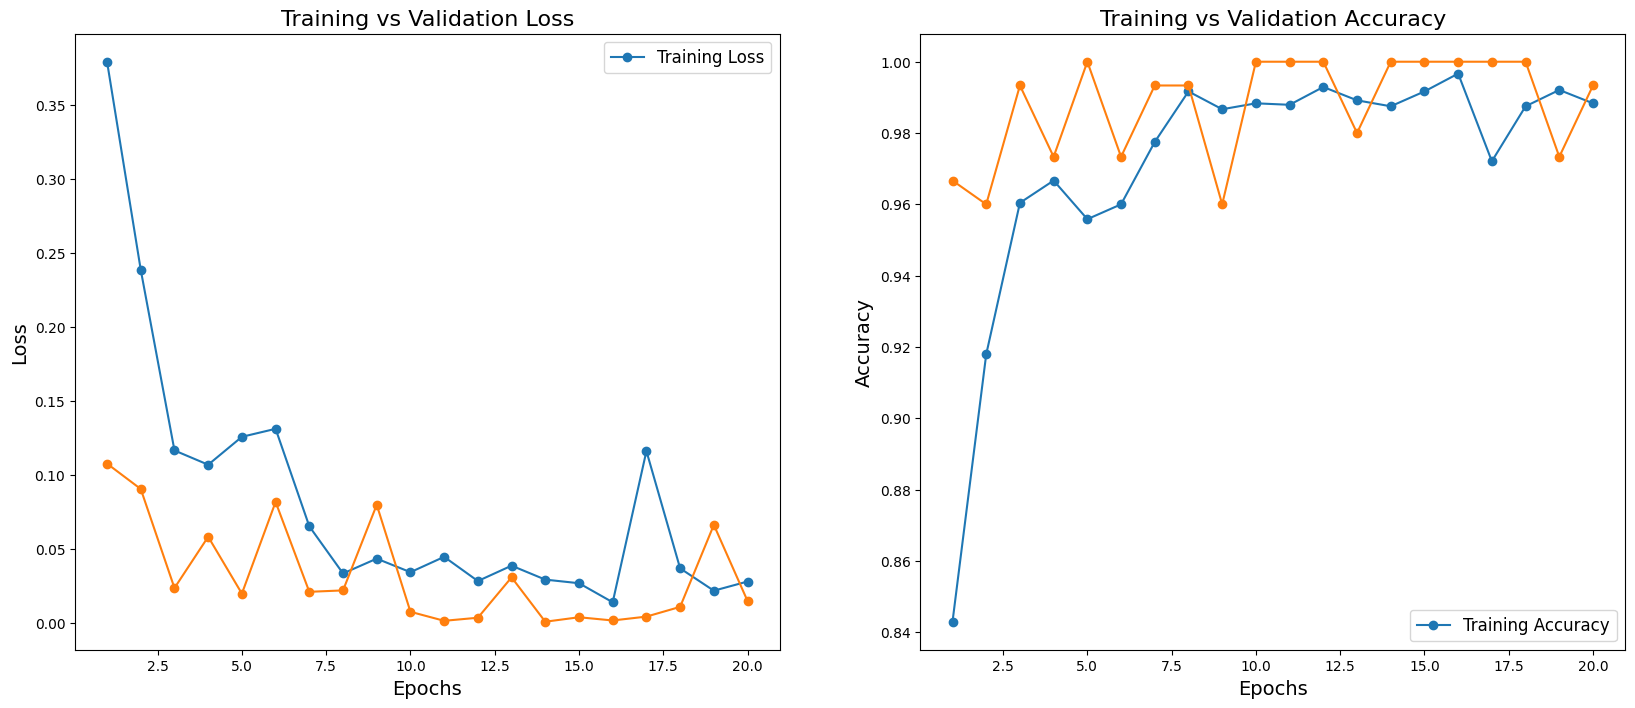

In [36]:
# Training function with learning curve
def train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs=20):
    model.train()
    train_losses = []
    train_accuracies = []
    val_losses= []
    val_accuracies = []
    
    for epoch in range(num_epochs):
        model.train()
        print(f'Epoch {epoch+1}/{num_epochs}')
        print('-' * 10)
        running_loss = 0.0
        correct = 0
        total = 0
        for inputs, labels in tqdm(train_loader, desc='Training', leave=False):
            inputs, labels = inputs.to(device), labels.to(device)
            
            optimizer.zero_grad()
            
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            
            running_loss += loss.item() * inputs.size(0)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
        
        epoch_loss = running_loss / len(train_loader.dataset)
        epoch_acc = correct / total
        train_losses.append(epoch_loss)
        train_accuracies.append(epoch_acc)
        
        # Validation phase
        model.eval()
        val_running_loss = 0.0
        val_correct = 0
        val_total = 0
        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                val_running_loss += loss.item() * inputs.size(0)
                _, predicted = torch.max(outputs, 1)
                val_total += labels.size(0)
                val_correct += (predicted == labels).sum().item()
        
        val_loss = val_running_loss / len(val_loader.dataset)
        val_acc = val_correct / val_total
        val_losses.append(val_loss)
        val_accuracies.append(val_acc)
        print(f'Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_acc:.4f}')
        print(f'Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss:.4f}, Accuracy: {epoch_acc:.4f}')
    
    # Plot learning curve
    plt.figure(figsize=(20, 8))
    plt.subplot(1, 2, 1)
    plt.plot(range(1, num_epochs + 1), train_losses, marker='o', label='Training Loss')
    plt.xlabel('Epochs', fontsize=14)
    plt.ylabel('Loss', fontsize=14)
    plt.legend(fontsize=12)
    plt.title('Training vs Validation Loss', fontsize=16)
    plt.plot(range(1, num_epochs + 1), val_losses, marker='o', label='Validation Loss')
    
    plt.subplot(1, 2, 2)
    plt.plot(range(1, num_epochs + 1), train_accuracies, marker='o', label='Training Accuracy')
    plt.xlabel('Epochs', fontsize=14)
    plt.ylabel('Accuracy', fontsize=14)
    plt.legend(fontsize=12)
    plt.title('Training vs Validation Accuracy', fontsize=16)
    plt.plot(range(1, num_epochs + 1), val_accuracies, marker='o', label='Validation Accuracy')
    plt.show()

# Train the model
train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs=20)

Confusion Matrix:
[[74  1]
 [ 0 75]]


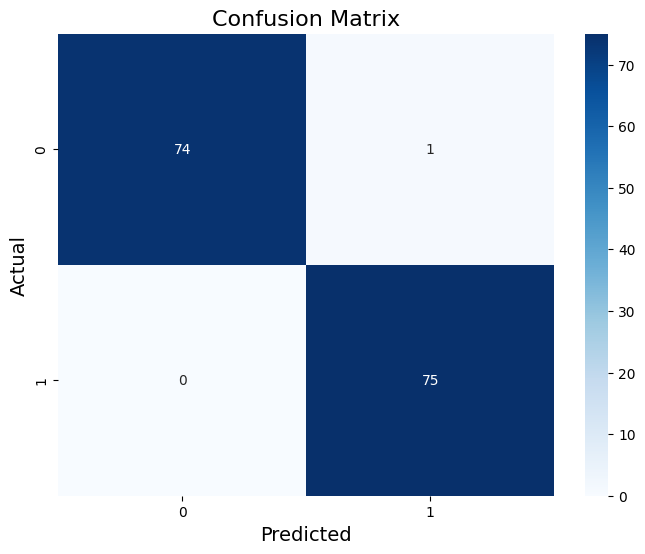

Specificity: 0.9867
Matthews Correlation Coefficient (MCC): 0.9868
F1 Score: 0.9933
PR AUC: 1.0000

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99        75
           1       0.99      1.00      0.99        75

    accuracy                           0.99       150
   macro avg       0.99      0.99      0.99       150
weighted avg       0.99      0.99      0.99       150



In [37]:
from sklearn.metrics import classification_report, confusion_matrix, matthews_corrcoef, f1_score, precision_recall_curve, auc
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def evaluate_model(model, data_loader):
    model.eval()
    all_labels = []
    all_preds = []
    all_probs = []

    # Try to fetch class names from dataset
    try:
        class_names = data_loader.dataset.classes
    except AttributeError:
        class_names = None

    with torch.no_grad():
        for inputs, labels in data_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            probs = torch.softmax(outputs, dim=1)  # Use softmax for multi-class
            _, predicted = torch.max(outputs, 1)

            all_labels.extend(labels.cpu().numpy())
            all_preds.extend(predicted.cpu().numpy())

            # For PR-AUC: assuming binary — take class 1 probability
            if probs.shape[1] == 2:
                all_probs.extend(probs[:, 1].cpu().numpy())
            else:
                all_probs.extend(probs.cpu().numpy())  # Multi-class: you can adjust this

    all_labels = np.array(all_labels)
    all_preds = np.array(all_preds)

    # --- Confusion Matrix ---
    cm = confusion_matrix(all_labels, all_preds)
    print("Confusion Matrix:")
    print(cm)

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names if class_names else np.arange(len(cm)),
                yticklabels=class_names if class_names else np.arange(len(cm)))
    plt.ylabel('Actual', fontsize=14)
    plt.xlabel('Predicted', fontsize=14)
    plt.title('Confusion Matrix', fontsize=16)
    plt.show()

    # --- Specificity ---
    if cm.shape == (2, 2):
        tn, fp, fn, tp = cm.ravel()
        specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
        print(f"Specificity: {specificity:.4f}")
    else:
        print("Specificity is only defined for binary classification.")

    # --- Matthews Correlation Coefficient ---
    mcc = matthews_corrcoef(all_labels, all_preds)
    print(f"Matthews Correlation Coefficient (MCC): {mcc:.4f}")

    # --- F1 Score ---
    f1 = f1_score(all_labels, all_preds, average='weighted')
    print(f"F1 Score: {f1:.4f}")

    # --- PR AUC ---
    if len(np.unique(all_labels)) == 2:
        precision, recall, _ = precision_recall_curve(all_labels, np.array(all_probs))
        pr_auc = auc(recall, precision)
        print(f"PR AUC: {pr_auc:.4f}")
    else:
        print("PR AUC is usually computed for binary classification.")

    # --- Classification Report ---
    report = classification_report(all_labels, all_preds, target_names=class_names if class_names else None)
    print("\nClassification Report:\n", report)
    
evaluate_model(model, val_loader)

In [38]:
# Save the model
torch.save(model.state_dict(), "nasnetmobile.pth")

In [39]:
model_nasnetlarge = model

# Ghost Net

In [40]:
import timm
import torch.nn as nn

# Create model
model = timm.create_model('ghostnet_100', pretrained=True)

# Get the number of features in the final layer
num_ftrs = model.classifier.in_features  # Access the classifier's input features

# Replace the final classification layer
model.classifier = nn.Sequential(
    nn.Linear(num_ftrs, 512),
    nn.ReLU(),
    nn.Dropout(0.4),
    nn.Linear(512, len(label_mapping)),  # Use your actual number of classes
    nn.LogSoftmax(dim=1)
)

model = model.to(device)

# Define loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

print("Ghost Net model initialized and ready for training!")

model.safetensors:   0%|          | 0.00/20.9M [00:00<?, ?B/s]

Ghost Net model initialized and ready for training!


Epoch 1/20
----------


Validation Loss: 0.0935, Validation Accuracy: 0.9667
Epoch 1/20, Loss: 0.3236, Accuracy: 0.8700
Epoch 2/20
----------


Validation Loss: 0.0269, Validation Accuracy: 0.9867
Epoch 2/20, Loss: 0.1494, Accuracy: 0.9467
Epoch 3/20
----------


Validation Loss: 0.0338, Validation Accuracy: 0.9933
Epoch 3/20, Loss: 0.1132, Accuracy: 0.9692
Epoch 4/20
----------


Validation Loss: 0.0349, Validation Accuracy: 0.9867
Epoch 4/20, Loss: 0.0680, Accuracy: 0.9758
Epoch 5/20
----------


Validation Loss: 0.0036, Validation Accuracy: 1.0000
Epoch 5/20, Loss: 0.0547, Accuracy: 0.9779
Epoch 6/20
----------


Validation Loss: 0.0184, Validation Accuracy: 0.9933
Epoch 6/20, Loss: 0.0825, Accuracy: 0.9754
Epoch 7/20
----------


Validation Loss: 0.0142, Validation Accuracy: 0.9933
Epoch 7/20, Loss: 0.0747, Accuracy: 0.9779
Epoch 8/20
----------


Validation Loss: 0.0113, Validation Accuracy: 1.0000
Epoch 8/20, Loss: 0.0784, Accuracy: 0.9742
Epoch 9/20
----------


Validation Loss: 0.0098, Validation Accuracy: 0.9933
Epoch 9/20, Loss: 0.0434, Accuracy: 0.9862
Epoch 10/20
----------


Validation Loss: 0.0187, Validation Accuracy: 0.9933
Epoch 10/20, Loss: 0.0449, Accuracy: 0.9892
Epoch 11/20
----------


Validation Loss: 0.0194, Validation Accuracy: 0.9933
Epoch 11/20, Loss: 0.0499, Accuracy: 0.9862
Epoch 12/20
----------


Validation Loss: 0.0017, Validation Accuracy: 1.0000
Epoch 12/20, Loss: 0.0225, Accuracy: 0.9925
Epoch 13/20
----------


Validation Loss: 0.0235, Validation Accuracy: 0.9933
Epoch 13/20, Loss: 0.0268, Accuracy: 0.9921
Epoch 14/20
----------


Validation Loss: 0.0009, Validation Accuracy: 1.0000
Epoch 14/20, Loss: 0.0286, Accuracy: 0.9921
Epoch 15/20
----------


Validation Loss: 0.0402, Validation Accuracy: 0.9867
Epoch 15/20, Loss: 0.0095, Accuracy: 0.9971
Epoch 16/20
----------


Validation Loss: 0.0048, Validation Accuracy: 1.0000
Epoch 16/20, Loss: 0.0266, Accuracy: 0.9896
Epoch 17/20
----------


Validation Loss: 0.0268, Validation Accuracy: 0.9867
Epoch 17/20, Loss: 0.0399, Accuracy: 0.9917
Epoch 18/20
----------


Validation Loss: 0.1583, Validation Accuracy: 0.9333
Epoch 18/20, Loss: 0.0737, Accuracy: 0.9858
Epoch 19/20
----------


Validation Loss: 0.0340, Validation Accuracy: 0.9800
Epoch 19/20, Loss: 0.0844, Accuracy: 0.9792
Epoch 20/20
----------


Validation Loss: 0.0348, Validation Accuracy: 0.9867
Epoch 20/20, Loss: 0.0361, Accuracy: 0.9883


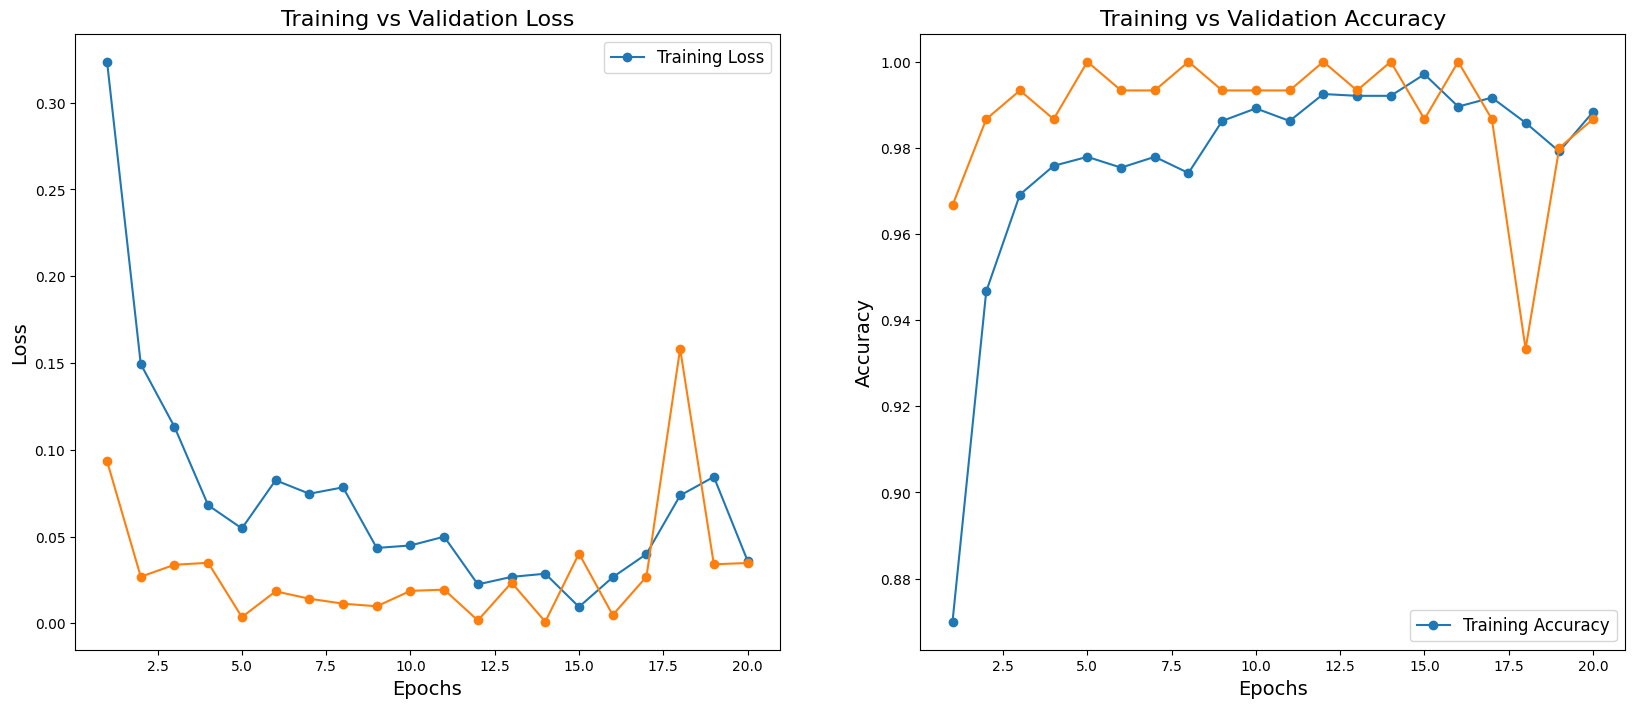

In [41]:
# Training function with learning curve
def train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs=20):
    model.train()
    train_losses = []
    train_accuracies = []
    val_losses= []
    val_accuracies = []
    
    for epoch in range(num_epochs):
        model.train()
        print(f'Epoch {epoch+1}/{num_epochs}')
        print('-' * 10)
        running_loss = 0.0
        correct = 0
        total = 0
        for inputs, labels in tqdm(train_loader, desc='Training', leave=False):
            inputs, labels = inputs.to(device), labels.to(device)
            
            optimizer.zero_grad()
            
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            
            running_loss += loss.item() * inputs.size(0)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
        
        epoch_loss = running_loss / len(train_loader.dataset)
        epoch_acc = correct / total
        train_losses.append(epoch_loss)
        train_accuracies.append(epoch_acc)
        
        # Validation phase
        model.eval()
        val_running_loss = 0.0
        val_correct = 0
        val_total = 0
        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                val_running_loss += loss.item() * inputs.size(0)
                _, predicted = torch.max(outputs, 1)
                val_total += labels.size(0)
                val_correct += (predicted == labels).sum().item()
        
        val_loss = val_running_loss / len(val_loader.dataset)
        val_acc = val_correct / val_total
        val_losses.append(val_loss)
        val_accuracies.append(val_acc)
        print(f'Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_acc:.4f}')
        print(f'Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss:.4f}, Accuracy: {epoch_acc:.4f}')
    
    # Plot learning curve
    plt.figure(figsize=(20, 8))
    plt.subplot(1, 2, 1)
    plt.plot(range(1, num_epochs + 1), train_losses, marker='o', label='Training Loss')
    plt.xlabel('Epochs', fontsize=14)
    plt.ylabel('Loss', fontsize=14)
    plt.legend(fontsize=12)
    plt.title('Training vs Validation Loss', fontsize=16)
    plt.plot(range(1, num_epochs + 1), val_losses, marker='o', label='Validation Loss')
    
    plt.subplot(1, 2, 2)
    plt.plot(range(1, num_epochs + 1), train_accuracies, marker='o', label='Training Accuracy')
    plt.xlabel('Epochs', fontsize=14)
    plt.ylabel('Accuracy', fontsize=14)
    plt.legend(fontsize=12)
    plt.title('Training vs Validation Accuracy', fontsize=16)
    plt.plot(range(1, num_epochs + 1), val_accuracies, marker='o', label='Validation Accuracy')
    plt.show()

# Train the model
train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs=20)

Confusion Matrix:
[[75  0]
 [ 2 73]]


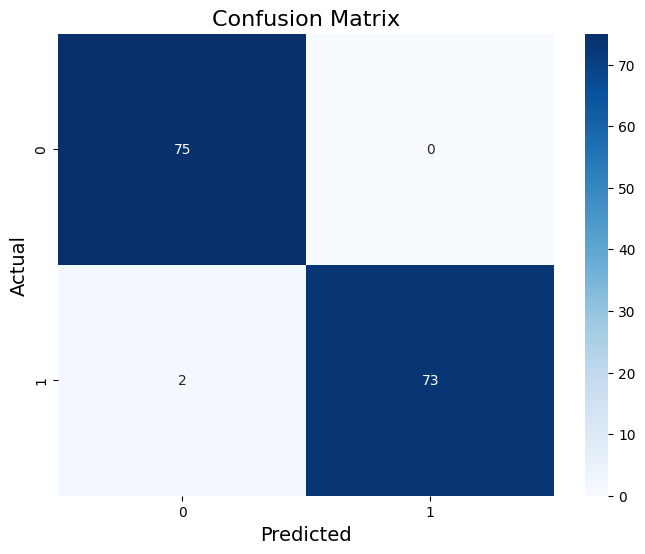

Specificity: 1.0000
Matthews Correlation Coefficient (MCC): 0.9737
F1 Score: 0.9867
PR AUC: 1.0000

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99        75
           1       1.00      0.97      0.99        75

    accuracy                           0.99       150
   macro avg       0.99      0.99      0.99       150
weighted avg       0.99      0.99      0.99       150



In [42]:
from sklearn.metrics import classification_report, confusion_matrix, matthews_corrcoef, f1_score, precision_recall_curve, auc
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def evaluate_model(model, data_loader):
    model.eval()
    all_labels = []
    all_preds = []
    all_probs = []

    # Try to fetch class names from dataset
    try:
        class_names = data_loader.dataset.classes
    except AttributeError:
        class_names = None

    with torch.no_grad():
        for inputs, labels in data_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            probs = torch.softmax(outputs, dim=1)  # Use softmax for multi-class
            _, predicted = torch.max(outputs, 1)

            all_labels.extend(labels.cpu().numpy())
            all_preds.extend(predicted.cpu().numpy())

            # For PR-AUC: assuming binary — take class 1 probability
            if probs.shape[1] == 2:
                all_probs.extend(probs[:, 1].cpu().numpy())
            else:
                all_probs.extend(probs.cpu().numpy())  # Multi-class: you can adjust this

    all_labels = np.array(all_labels)
    all_preds = np.array(all_preds)

    # --- Confusion Matrix ---
    cm = confusion_matrix(all_labels, all_preds)
    print("Confusion Matrix:")
    print(cm)

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names if class_names else np.arange(len(cm)),
                yticklabels=class_names if class_names else np.arange(len(cm)))
    plt.ylabel('Actual', fontsize=14)
    plt.xlabel('Predicted', fontsize=14)
    plt.title('Confusion Matrix', fontsize=16)
    plt.show()

    # --- Specificity ---
    if cm.shape == (2, 2):
        tn, fp, fn, tp = cm.ravel()
        specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
        print(f"Specificity: {specificity:.4f}")
    else:
        print("Specificity is only defined for binary classification.")

    # --- Matthews Correlation Coefficient ---
    mcc = matthews_corrcoef(all_labels, all_preds)
    print(f"Matthews Correlation Coefficient (MCC): {mcc:.4f}")

    # --- F1 Score ---
    f1 = f1_score(all_labels, all_preds, average='weighted')
    print(f"F1 Score: {f1:.4f}")

    # --- PR AUC ---
    if len(np.unique(all_labels)) == 2:
        precision, recall, _ = precision_recall_curve(all_labels, np.array(all_probs))
        pr_auc = auc(recall, precision)
        print(f"PR AUC: {pr_auc:.4f}")
    else:
        print("PR AUC is usually computed for binary classification.")

    # --- Classification Report ---
    report = classification_report(all_labels, all_preds, target_names=class_names if class_names else None)
    print("\nClassification Report:\n", report)
    
evaluate_model(model, val_loader)

In [43]:
# Save the model
torch.save(model.state_dict(), "ghostnet.pth")

In [44]:
model_ghostnet = model

# Dark Net

In [45]:
import timm
import torch.nn as nn

# Install first: pip install timm

# Device setup
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load DarkNet-53
model = timm.create_model('darknet53', pretrained=True)

# Replace head (verify layer name with print(model))
num_ftrs = model.head.fc.in_features
model.head.fc = nn.Sequential(
    nn.Linear(num_ftrs, 512),
    nn.ReLU(),
    nn.Dropout(0.4),
    nn.Linear(512, len(label_mapping)),  # Use your actual number of classes
    nn.LogSoftmax(dim=1)
)

model = model.to(device)

# Define loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

print("Dark Net model initialized and ready for training!")

model.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

Dark Net model initialized and ready for training!


Epoch 1/20
----------


Validation Loss: 0.7668, Validation Accuracy: 0.7400
Epoch 1/20, Loss: 0.4427, Accuracy: 0.8108
Epoch 2/20
----------


Validation Loss: 0.2503, Validation Accuracy: 0.9333
Epoch 2/20, Loss: 0.2954, Accuracy: 0.8833
Epoch 3/20
----------


Validation Loss: 0.6620, Validation Accuracy: 0.8600
Epoch 3/20, Loss: 0.1970, Accuracy: 0.9221
Epoch 4/20
----------


Validation Loss: 0.0529, Validation Accuracy: 0.9867
Epoch 4/20, Loss: 0.1495, Accuracy: 0.9408
Epoch 5/20
----------


Validation Loss: 0.0605, Validation Accuracy: 0.9800
Epoch 5/20, Loss: 0.1742, Accuracy: 0.9442
Epoch 6/20
----------


Validation Loss: 0.0211, Validation Accuracy: 0.9867
Epoch 6/20, Loss: 0.0727, Accuracy: 0.9796
Epoch 7/20
----------


Validation Loss: 0.1072, Validation Accuracy: 0.9600
Epoch 7/20, Loss: 0.0886, Accuracy: 0.9675
Epoch 8/20
----------


Validation Loss: 0.0014, Validation Accuracy: 1.0000
Epoch 8/20, Loss: 0.0540, Accuracy: 0.9825
Epoch 9/20
----------


Validation Loss: 0.0106, Validation Accuracy: 0.9933
Epoch 9/20, Loss: 0.0464, Accuracy: 0.9846
Epoch 10/20
----------


Validation Loss: 0.0035, Validation Accuracy: 1.0000
Epoch 10/20, Loss: 0.0305, Accuracy: 0.9900
Epoch 11/20
----------


Validation Loss: 0.0038, Validation Accuracy: 1.0000
Epoch 11/20, Loss: 0.0313, Accuracy: 0.9912
Epoch 12/20
----------


Validation Loss: 0.0209, Validation Accuracy: 0.9867
Epoch 12/20, Loss: 0.0326, Accuracy: 0.9900
Epoch 13/20
----------


Validation Loss: 0.0159, Validation Accuracy: 1.0000
Epoch 13/20, Loss: 0.0449, Accuracy: 0.9875
Epoch 14/20
----------


Validation Loss: 0.0072, Validation Accuracy: 1.0000
Epoch 14/20, Loss: 0.0202, Accuracy: 0.9950
Epoch 15/20
----------


Validation Loss: 0.0471, Validation Accuracy: 0.9867
Epoch 15/20, Loss: 0.0113, Accuracy: 0.9975
Epoch 16/20
----------


Validation Loss: 0.0052, Validation Accuracy: 1.0000
Epoch 16/20, Loss: 0.0294, Accuracy: 0.9896
Epoch 17/20
----------


Validation Loss: 0.0042, Validation Accuracy: 1.0000
Epoch 17/20, Loss: 0.0171, Accuracy: 0.9925
Epoch 18/20
----------


Validation Loss: 0.2732, Validation Accuracy: 0.9267
Epoch 18/20, Loss: 0.0300, Accuracy: 0.9896
Epoch 19/20
----------


Validation Loss: 0.1544, Validation Accuracy: 0.9800
Epoch 19/20, Loss: 0.1240, Accuracy: 0.9667
Epoch 20/20
----------


Validation Loss: 0.0055, Validation Accuracy: 1.0000
Epoch 20/20, Loss: 0.0604, Accuracy: 0.9783


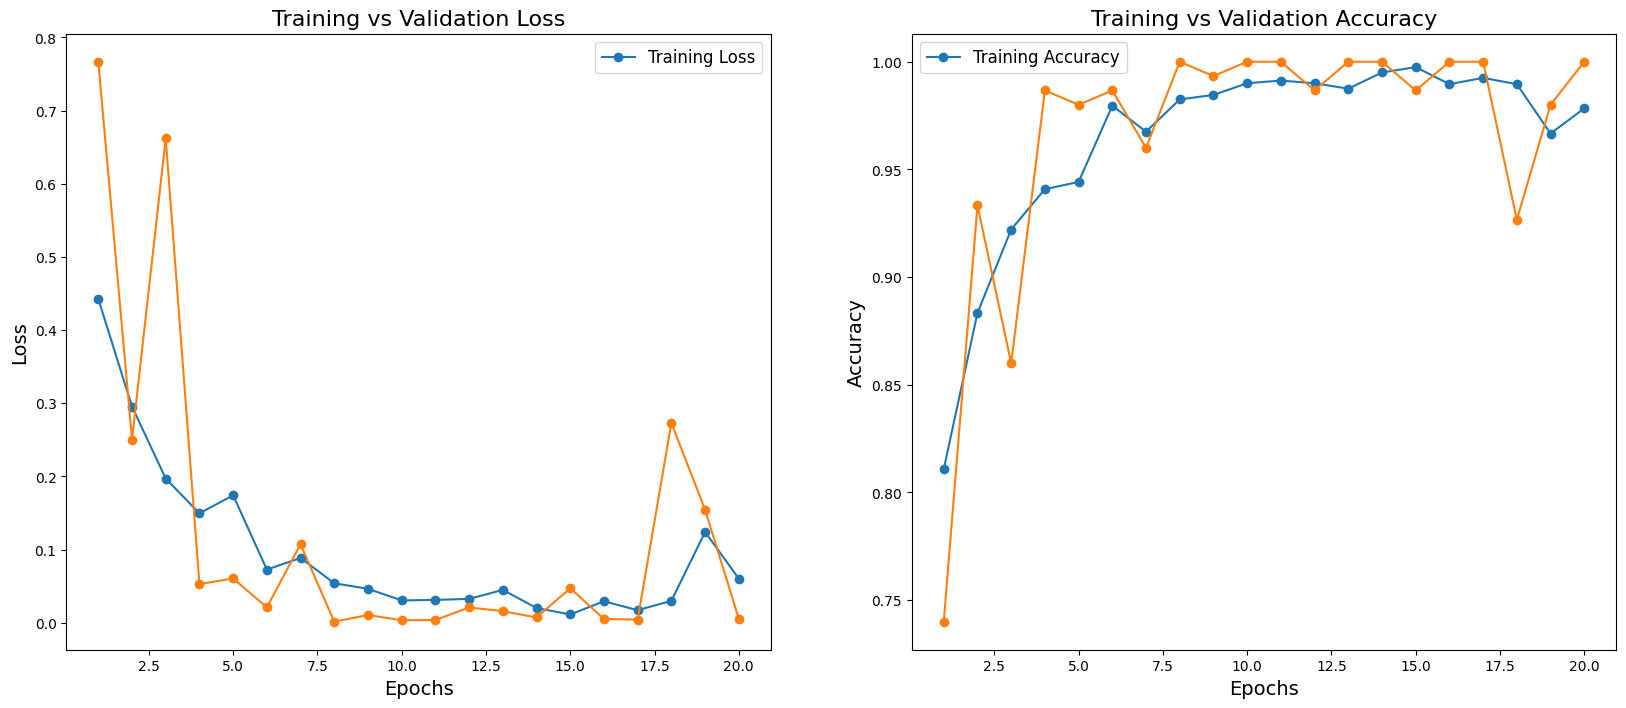

In [46]:
# Training function with learning curve
def train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs=20):
    model.train()
    train_losses = []
    train_accuracies = []
    val_losses= []
    val_accuracies = []
    
    for epoch in range(num_epochs):
        model.train()
        print(f'Epoch {epoch+1}/{num_epochs}')
        print('-' * 10)
        running_loss = 0.0
        correct = 0
        total = 0
        for inputs, labels in tqdm(train_loader, desc='Training', leave=False):
            inputs, labels = inputs.to(device), labels.to(device)
            
            optimizer.zero_grad()
            
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            
            running_loss += loss.item() * inputs.size(0)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
        
        epoch_loss = running_loss / len(train_loader.dataset)
        epoch_acc = correct / total
        train_losses.append(epoch_loss)
        train_accuracies.append(epoch_acc)
        
        # Validation phase
        model.eval()
        val_running_loss = 0.0
        val_correct = 0
        val_total = 0
        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                val_running_loss += loss.item() * inputs.size(0)
                _, predicted = torch.max(outputs, 1)
                val_total += labels.size(0)
                val_correct += (predicted == labels).sum().item()
        
        val_loss = val_running_loss / len(val_loader.dataset)
        val_acc = val_correct / val_total
        val_losses.append(val_loss)
        val_accuracies.append(val_acc)
        print(f'Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_acc:.4f}')
        print(f'Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss:.4f}, Accuracy: {epoch_acc:.4f}')
    
    # Plot learning curve
    plt.figure(figsize=(20, 8))
    plt.subplot(1, 2, 1)
    plt.plot(range(1, num_epochs + 1), train_losses, marker='o', label='Training Loss')
    plt.xlabel('Epochs', fontsize=14)
    plt.ylabel('Loss', fontsize=14)
    plt.legend(fontsize=12)
    plt.title('Training vs Validation Loss', fontsize=16)
    plt.plot(range(1, num_epochs + 1), val_losses, marker='o', label='Validation Loss')
    
    plt.subplot(1, 2, 2)
    plt.plot(range(1, num_epochs + 1), train_accuracies, marker='o', label='Training Accuracy')
    plt.xlabel('Epochs', fontsize=14)
    plt.ylabel('Accuracy', fontsize=14)
    plt.legend(fontsize=12)
    plt.title('Training vs Validation Accuracy', fontsize=16)
    plt.plot(range(1, num_epochs + 1), val_accuracies, marker='o', label='Validation Accuracy')
    plt.show()

# Train the model
train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs=20)

Confusion Matrix:
[[75  0]
 [ 0 75]]


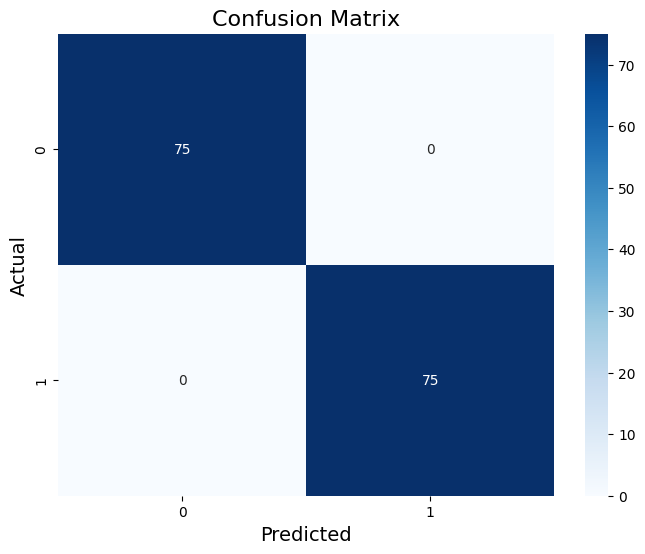

Specificity: 1.0000
Matthews Correlation Coefficient (MCC): 1.0000
F1 Score: 1.0000
PR AUC: 1.0000

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        75
           1       1.00      1.00      1.00        75

    accuracy                           1.00       150
   macro avg       1.00      1.00      1.00       150
weighted avg       1.00      1.00      1.00       150



In [47]:
from sklearn.metrics import classification_report, confusion_matrix, matthews_corrcoef, f1_score, precision_recall_curve, auc
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def evaluate_model(model, data_loader):
    model.eval()
    all_labels = []
    all_preds = []
    all_probs = []

    # Try to fetch class names from dataset
    try:
        class_names = data_loader.dataset.classes
    except AttributeError:
        class_names = None

    with torch.no_grad():
        for inputs, labels in data_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            probs = torch.softmax(outputs, dim=1)  # Use softmax for multi-class
            _, predicted = torch.max(outputs, 1)

            all_labels.extend(labels.cpu().numpy())
            all_preds.extend(predicted.cpu().numpy())

            # For PR-AUC: assuming binary — take class 1 probability
            if probs.shape[1] == 2:
                all_probs.extend(probs[:, 1].cpu().numpy())
            else:
                all_probs.extend(probs.cpu().numpy())  # Multi-class: you can adjust this

    all_labels = np.array(all_labels)
    all_preds = np.array(all_preds)

    # --- Confusion Matrix ---
    cm = confusion_matrix(all_labels, all_preds)
    print("Confusion Matrix:")
    print(cm)

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names if class_names else np.arange(len(cm)),
                yticklabels=class_names if class_names else np.arange(len(cm)))
    plt.ylabel('Actual', fontsize=14)
    plt.xlabel('Predicted', fontsize=14)
    plt.title('Confusion Matrix', fontsize=16)
    plt.show()

    # --- Specificity ---
    if cm.shape == (2, 2):
        tn, fp, fn, tp = cm.ravel()
        specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
        print(f"Specificity: {specificity:.4f}")
    else:
        print("Specificity is only defined for binary classification.")

    # --- Matthews Correlation Coefficient ---
    mcc = matthews_corrcoef(all_labels, all_preds)
    print(f"Matthews Correlation Coefficient (MCC): {mcc:.4f}")

    # --- F1 Score ---
    f1 = f1_score(all_labels, all_preds, average='weighted')
    print(f"F1 Score: {f1:.4f}")

    # --- PR AUC ---
    if len(np.unique(all_labels)) == 2:
        precision, recall, _ = precision_recall_curve(all_labels, np.array(all_probs))
        pr_auc = auc(recall, precision)
        print(f"PR AUC: {pr_auc:.4f}")
    else:
        print("PR AUC is usually computed for binary classification.")

    # --- Classification Report ---
    report = classification_report(all_labels, all_preds, target_names=class_names if class_names else None)
    print("\nClassification Report:\n", report)
    
evaluate_model(model, val_loader)

In [48]:
# Save the model
torch.save(model.state_dict(), "darknet.pth")

In [49]:
model_darknet = model